

Infi-flux License

Copyright (c) 2023 Infi-flux

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE AND HYPERLINKS LINKED TO EXTERNAL SITES PROOVIDED BELOW OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE AND HYPERLINKS LINKED TO EXTERNAL SITES PROOVIDED IN THIS DIALOGUE.




This notebook is dedicated to giving a flavor of the concept and practical implementation stated in the document called Generic Strategy Building placed under the guide section of the web-based platform Called [Infi-flux](https://infiflux.com)

The notebook is structured in such a way that normal folk with a basic understanding of Python will be able to follow through. If one is not comfortable with Python, you could convert the algorithm of the following code through various code Ai generators. And folks who have no coding experience, One can design the same in Excel. But in this notebook, all you would be required to do is change certain parameters just to get started.

Assumptions: There are multiple phases of a concept taken from the G-BIA generic basic investment architecture. Also, available under the guide section of Infi-flux.

Phase 1:
*   Instrument type: Equity
*   Instrument name: Apple
*   Type of Investor: Intraday
*   Market Potential: Game of Curiosity [GOC]
  * Available under the guide section of Infi-flux
  * Ticker Symbol: AAPL
  * Time Period for this strategy: data_days = 30 days
  * Time bound per trade: taking the average duration of the trades window = 25 minutes
  *Number of trades per day 3
  * Ignoring the first and last 20 minutes of the trading session of each day
  * Time Frame: 1 minute
  * Output of GOC 30-01-2024->
  * Expected return for 3 trades in descending order if one stock is invested with the above conditions as Buy Sentiment when an individual makes no mistakes: 0.920014, 0.690474,	0.545446
  * Expected return for 3 trades in descending order if one stock is invested with the above conditions as Sell Sentiment when an individual makes no mistakes: 0.989134,	0.599956,	0.499953
  * One can check for each Weekday including Sundays. Yes, some stock exchanges are open on Sundays.
* Budget: $100
* Ignoring Risk management as this notebook is for illustration purposes only
* Investment Vehicle: Choose financial market Intermediaries like brokers etc that provide the best optimized low-cost transaction cost for placing trades, and investing by conducting market research. Beware of automated margin-providing services. Ensure trading hygiene and place what you want to place and not some trading error.

Phase 2:

We assumed retail trader conditions for the phase 1 analysis for GOC. This document is meant to be  generic and avoid complicated concepts. We will be  using Chatgpt. One can also use Bard, copilot, or other code generator.

*   Deciding on Entry and Exit Signal
  * The prompt used for chatgpt was: "Give me an entry and exit signal for AAPL stock that generates at least 1 signal each day in Python, take any approach you think is good."
  * It gave us a simple moving average cross-over strategy.


In [ ]:
import yfinance as yf

# Download historical data for AAPL stock
data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')

# Calculate 50-day and 200-day simple moving averages
# but we are going to reduce the 50-200 configuration to 5-20 to get more signals for demonsstration purposes.
data['SMA_50'] = data['Close'].rolling(window=5).mean()    # please pay attention ti the value edited from 50 to 5
data['SMA_200'] = data['Close'].rolling(window=20).mean()  # please pay attention to the value edited from 200 to 20

# Initialize signals list
signals = []

# Generate signals
for i in range(1, len(data)):
    if data['SMA_50'][i] > data['SMA_200'][i] and data['SMA_50'][i - 1] <= data['SMA_200'][i - 1]:
        signals.append((data.index[i], 'Buy'))  # Generate buy signal
    elif data['SMA_50'][i] < data['SMA_200'][i] and data['SMA_50'][i - 1] >= data['SMA_200'][i - 1]:
        signals.append((data.index[i], 'Sell'))  # Generate sell signal

# Print signals
for signal in signals:
    print(signal)


[*********************100%%**********************]  1 of 1 completed

(Timestamp('2020-02-24 00:00:00'), 'Sell')
(Timestamp('2020-04-08 00:00:00'), 'Buy')
(Timestamp('2020-07-28 00:00:00'), 'Sell')
(Timestamp('2020-07-31 00:00:00'), 'Buy')
(Timestamp('2020-09-09 00:00:00'), 'Sell')
(Timestamp('2020-10-01 00:00:00'), 'Buy')
(Timestamp('2020-10-23 00:00:00'), 'Sell')
(Timestamp('2020-11-10 00:00:00'), 'Buy')
(Timestamp('2020-11-25 00:00:00'), 'Sell')
(Timestamp('2020-12-01 00:00:00'), 'Buy')
(Timestamp('2021-01-12 00:00:00'), 'Sell')
(Timestamp('2021-01-22 00:00:00'), 'Buy')
(Timestamp('2021-02-12 00:00:00'), 'Sell')
(Timestamp('2021-03-18 00:00:00'), 'Buy')
(Timestamp('2021-03-23 00:00:00'), 'Sell')
(Timestamp('2021-04-05 00:00:00'), 'Buy')
(Timestamp('2021-05-04 00:00:00'), 'Sell')
(Timestamp('2021-06-09 00:00:00'), 'Buy')
(Timestamp('2021-08-02 00:00:00'), 'Sell')
(Timestamp('2021-08-04 00:00:00'), 'Buy')
(Timestamp('2021-08-10 00:00:00'), 'Sell')
(Timestamp('2021-08-12 00:00:00'), 'Buy')
(Timestamp('2021-09-15 00:00:00'), 'Sell')
(Timestamp('2021-10-18

We are still in phase 2 , we are going to ask chatgpt to give the code for accuracy. the prompt used was "give out the accuracy for the above strategy in python itself by how much money is made"

In [ ]:
initial_capital = 10000  # Initial capital in dollars
capital = initial_capital
position = None
buy_price = None
profit = 0

# Simulate trading based on signals
for i in range(1, len(data)):
    if data['SMA_50'][i] > data['SMA_200'][i] and data['SMA_50'][i - 1] <= data['SMA_200'][i - 1]:
        if position != 'long':  # Buy signal
            position = 'long'
            buy_price = data['Close'][i]
    elif data['SMA_50'][i] < data['SMA_200'][i] and data['SMA_50'][i - 1] >= data['SMA_200'][i - 1]:
        if position == 'long':  # Sell signal
            position = None
            profit += (data['Close'][i] - buy_price)
            capital += (data['Close'][i] - buy_price)

print("Final capital:", capital)
print("Profit:", profit)


Final capital: 10112.89501953125
Profit: 112.89501953125


Now we want to know how many of those trades made money to calculate accuracy: Lets ask chatgpt. Prompt used was "Now give me the accuracy in terms of trades that were sucessful and made money. and consider every single trade as buy and sell or sell and buy signal as 1 trade ."

In [ ]:
successful_trades = 0
total_trades = 0
position = None
# Simulate trading based on signals
for i in range(1, len(data)):
    if data['SMA_50'][i] > data['SMA_200'][i] and data['SMA_50'][i - 1] <= data['SMA_200'][i - 1]:
        if position != 'long':  # Buy signal
            # total_trades += 1    ## this line is invalid, even after we specified to take a combination of entry and exit signal as 1 trade, it increments the count of the total number of trades even for just entry signals.
            # as the analysis of the strategy that it spits out is for taking long position only. so the short position generate during phase 2 are ignored here.
            # this type of error may occur but simple addition subtraction concepts will help you catch this kind of blunder. It happens some times.
            # there might me more blunder like this in the code, be careful.
            position = 'long'
            buy_price = data['Close'][i]
    elif data['SMA_50'][i] < data['SMA_200'][i] and data['SMA_50'][i - 1] >= data['SMA_200'][i - 1]:
        if position == 'long':  # Sell signal
            total_trades += 1
            position = None
            trade_profit = data['Close'][i] - buy_price
            if trade_profit > 0:
                successful_trades += 1

accuracy = successful_trades / total_trades if total_trades > 0 else 0

print("Total trades:", total_trades)
print("Successful trades:", successful_trades)
print("Accuracy:", accuracy)


Total trades: 24
Successful trades: 14
Accuracy: 0.5833333333333334


So now we have the accuracy, this is called the win rate of the strategy in percentage: which came out to be ~58%. We cannot implement forward testing here, so we'll skip it.

let's go to phase three.
Phase 3:

* Calculate risk-reward ratio: we are going to ask chatgpt. Prompt used was: "Calculate the risk-to-reward ratio for the above strategy, such that store the amount of money made in each winning trade and average the amount which will be the average reward made implementing the above strategy and do the same for losing trades as well"



In [ ]:
winning_trades = []
losing_trades = []
position = None
buy_price = None
capital = initial_capital

# Simulate trading based on signals
for i in range(1, len(data)):
    if data['SMA_50'][i] > data['SMA_200'][i] and data['SMA_50'][i - 1] <= data['SMA_200'][i - 1]:
        if position != 'long':  # Buy signal
            position = 'long'
            buy_price = data['Close'][i]
    elif data['SMA_50'][i] < data['SMA_200'][i] and data['SMA_50'][i - 1] >= data['SMA_200'][i - 1]:
        if position == 'long':  # Sell signal
            position = None
            if data['Close'][i] > buy_price:  # Winning trade
                winning_trades.append(data['Close'][i] - buy_price)
            else:  # Losing trade
                losing_trades.append(buy_price - data['Close'][i])

# Calculate average reward and average risk
average_reward = sum(winning_trades) / len(winning_trades) if winning_trades else 0
average_risk = sum(losing_trades) / len(losing_trades) if losing_trades else 0

# Calculate risk-to-reward ratio
risk_to_reward_ratio = average_reward / average_risk if average_risk != 0 else float('inf')

print("Average Reward:", average_reward)
print("Average Risk:", average_risk)
print("Risk-to-Reward Ratio:", risk_to_reward_ratio)


Average Reward: 12.113929748535156
Average Risk: 5.669999694824218
Risk-to-Reward Ratio: 2.136495661471233


So now for phase 3: We have the accuracy of the strategy using a backtesting algorithm, the averaged-out risk-to-reward ratio of that strategy. We are going to calculate Position sizing, how much of the total fraction one should bet each time while placing trades or investing each time. We have explained in detail about the Kelly criterion approach, please check out the link to that collab notebook in the story tool document that is under our guide section.
We are going to use chatgpt again. The prompt used was: "Calculate the position sizing of the above strategy using Kelly criterion in Python and take accuracy using formula   winning / total, risk reward ratio as payout that we calculate into consideration for calculating position sizing"


In [ ]:
initial_capital = 10000  # Initial capital in dollars
capital = initial_capital
# Calculate the probability of success (accuracy)
accuracy = len(winning_trades) / (len(winning_trades) + len(losing_trades)) if len(winning_trades) + len(losing_trades) > 0 else 0

# Calculate the expected return (risk-to-reward ratio)
expected_return = average_reward / average_risk if average_risk != 0 else 0

# Calculate the Kelly Criterion fraction
# kelly_fraction = (accuracy * expected_return - (1 - accuracy)) / expected_return
# we had to change the kelly formula to the one that is related to investing which was
# given by chatgpt to the below one
# One can find references here
# https://en.wikipedia.org/wiki/Kelly_criterion
# https://wayback.archive-it.org/all/20090320125959/http://www.edwardothorp.com/sitebuildercontent/sitebuilderfiles/KellyCriterion2007.pdf
kelly_fraction_gpt = (accuracy * expected_return - (1 - accuracy)) / expected_return

kelly_fraction = accuracy / (average_risk/data.iloc[0].Close ) - (1 - accuracy)/ (average_reward/data.iloc[0].Close)

# Ensure the Kelly fraction is within [0, 1]
kelly_fraction = max(0, kelly_fraction)

# Calculate position size based on Kelly fraction
position_size = capital * kelly_fraction

print("Accuracy:", accuracy)
print("Risk-to-Reward Ratio:", expected_return)
print(average_reward/data.iloc[0].Close, average_risk/data.iloc[0].Close)
print("Kelly Criterion Fraction given by Chat-Gpt:", kelly_fraction_gpt)
print("Kelly Criterion Fraction:", kelly_fraction)
print("Position Size:", position_size)

Accuracy: 0.5833333333333334
Risk-to-Reward Ratio: 2.136495661471233
0.1613308407173475 0.0755118971813179
Kelly Criterion Fraction given by Chat-Gpt: 0.3883099245894365
Kelly Criterion Fraction: 5.142367482266181
Position Size: 51423.67482266181


you can notice the difference between the value given by the formula given by chatgpt and the one from reference. Both are correct but serve different cases. One which we are interested in is financial markets.

So why don't we test the different outcomes of Kelly's criterion that we have from chat-gpt and reference? We will be using Monte Carlo simulation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kelly_criterion_gpt(p, b, a):
    # q = 1 - p
    # #kelly_fraction_gpt = (accuracy * expected_return - (1 - accuracy)) / expected_return
    # f = (p*b - q)/b
    # return f
    return 0.3883099245894365 # calculated from above
def kelly_criterion(p, b, a):
    # q = 1 - p
    # f = (p/a - q/b)
    # return f
    return 5.142367482266181  # calculated from above

def kelly_criterion_fun(p, b, a):
    # q = 1 - p
    # f = (p/a - q/b)
    # return f
    return 5.142367482266181 + 1 # adding one for verification

def S_I_G_K_S(p, b, a, initial_capital, num_bets,typ):
    bet_sizes = []
    cap_li = []
    if typ == 'simple':
      f = kelly_criterion(p, b, a)
    elif typ == 'gpt':
      f = kelly_criterion_gpt(p, b, a)
    elif typ == 'fun':
      f = kelly_criterion_fun(p, b, a)
    '''
    Please note this
    there are some conditions on considering initial capital , the first amount to be invested.
    the condition are for f < 1 depending on different payout. if wining payout is greater than losing payout,
    we have included the whole capital. This helps in case of wining and geometric nature,
    this helps in the long run and one can see in the average growth rate. By removing below conditions of capital
    and replacing it with 'capital = initial_capital * f' . and in case of a > b we have consider the fraction of the initial capital.
    In case of having edge and better payoff , while considering initial capital, one have better chances of growing the capital .
    if the whole initial capital is consider.  Food for thought try it you self.
    '''

    ###############################
    # conditions on initial capital
    if f > 1 :
      capital = f*initial_capital
    elif f < 1 and b > a:
      capital = initial_capital
    elif f < 1 and a > b:
      capital = initial_capital * f
    elif f < 0:
      print('Unattractive opportunity')
    cap_li.append(capital)
    ###############################
    # the original assumption
    # capital _ initial_capital * f
    ###############################

    for _ in range(num_bets):
        bet_size = f * capital
        outcome = np.random.choice([0, 1], p=[1 - p, p])   # our con toss
        capital -= bet_size # removing the capital / simulating investment
        capital += bet_size * (1+b) if outcome == 1 else  bet_size *(1- a)   # adding back profit or loss
        if capital <= 0:                                # This condition states that when capital reaches 0 or less
          bet_sizes.append(bet_size)                    # Means you went bankrupt and hence stop trading
          cap_li.append(0)                              # you can exclude this condition as traders
                                                        # brower more money to continue when hit rock bottom
          return capital, bet_sizes, cap_li             # person losses more or bounce back....
                                                        # so excluding will be a practical scenerio.
                                                        # Only thing would be references points.
        # maintaining records                           # learnings and insights will still be the same
                                                        # including and excluding which applies to both notebooks
                                                        # GSB and Position Sizing
        bet_sizes.append(bet_size)
        cap_li.append(capital)

    return capital, bet_sizes, cap_li


def results(caps_li,gr_rate, strategy):
  df = pd.DataFrame(caps_li).T

  colors = plt.cm.tab20.colors
  for i, column in enumerate(df.columns):
      plt.plot(df.index, df[column], label=column, color=colors[i%20])
  plt.xlabel('Bets')
  plt.ylabel('Cap')
  plt.legend([])
  plt.show()
  if strategy != 'Additive':
    dff = np.log(pd.DataFrame(caps_li)).T
    colors = plt.cm.tab20.colors
    for i, column in enumerate(dff.columns):
        plt.plot(df.index, dff[column], label=column, color=colors[i%20])
    plt.xlabel('Bets')
    plt.ylabel('Cap')
    plt.legend([])
    plt.show()
  else:
    print(' No need for logarithmic view for Additive Investment strategies -> ')

  plt.plot(df.index, df.mean(axis = 1), label='Mean', color='black')
  plt.plot(df.index, df.median(axis = 1), label='Median', color='red')

  plt.xlabel('Bets')
  plt.ylabel('Cap')
  plt.legend()
  plt.show()
  df.median(axis = 1).plot()
  plt.ylabel('Median Value')
  plt.xlabel('Bets')

  # Show the plot
  plt.show()


p = 0.5833333333333334
initial_capital = data.iloc[0].Close     # we are buying only one stock , so we are considering the starting price.
b = 12.113929748535156/initial_capital
a = 5.669999694824218/initial_capital
num_bets = 50
print(p,b,a)

fin_cap = []
caps_li = []
gr_rate = []

fin_cap_g = []
caps_li_g = []
gr_rate_g = []

fin_cap_fun = []
caps_li_fun = []
gr_rate_fun = []

print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p, b, a))


monte = 10000
for i in range(monte):
    final_capital, bet_sizes, cap_li = S_I_G_K_S(p, b, a, initial_capital, num_bets,'simple')
    final_capital_g, bet_sizes_g, cap_li_g = S_I_G_K_S(p, b, a, initial_capital, num_bets,'gpt')
    final_capital_fun, bet_sizes_fun, cap_li_fun = S_I_G_K_S(p, b, a, initial_capital, num_bets,'fun')

    fin_cap.append(final_capital)
    gr_rate.append((final_capital - initial_capital)/(initial_capital))
    caps_li.append(cap_li)

    fin_cap_g.append(final_capital_g)
    gr_rate_g.append((final_capital_g - initial_capital)/(initial_capital))
    caps_li_g.append(cap_li_g)

    fin_cap_fun.append(final_capital_fun)
    gr_rate_fun.append((final_capital_fun - initial_capital)/(initial_capital))
    caps_li_fun.append(cap_li_fun)

    if i%(monte/10) == 0:
        print(i)


0.5833333333333334 0.1613308407173475 0.0755118971813179
5.142367482266181
0.3883099245894365
0
1000
2000
3000
4000
5000
6000
7000
8000
9000


Capital Median - > 515672.4724630427 , Capital Mean ->  1102446707.0325599
Growth rate Median -> 6866.620602415653 Growth rate Mean -> 14682157.941792734


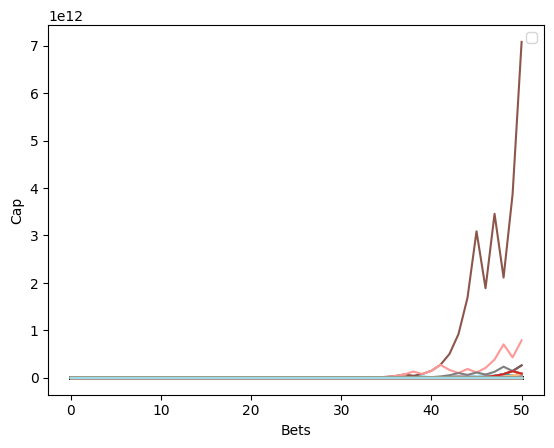

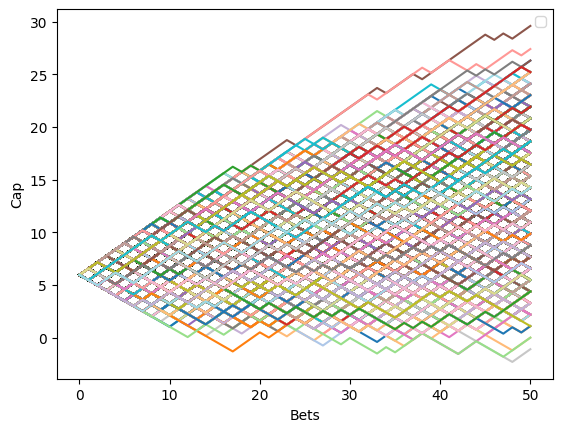

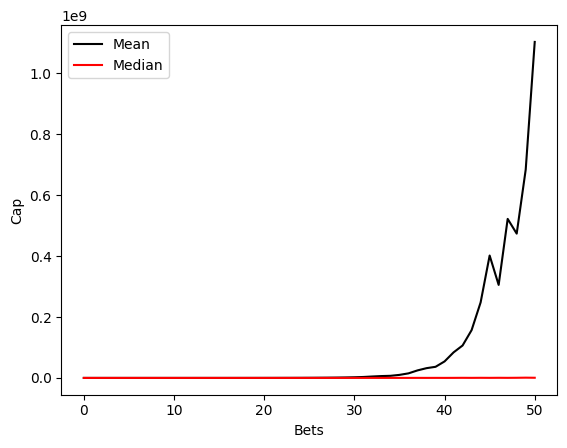

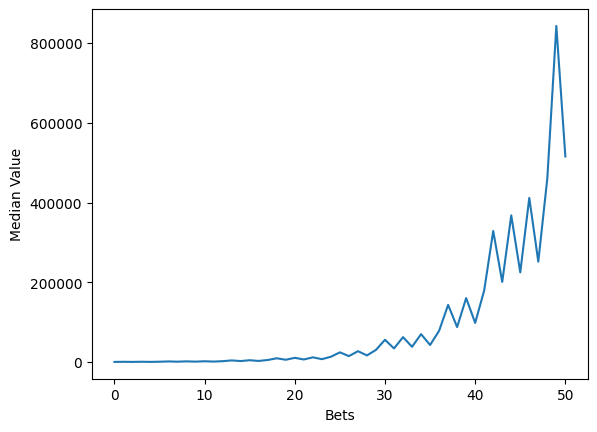

In [ ]:
# kelly criterion from reference provided above taken from wikipedia.
df = pd.DataFrame(caps_li).T
print ('Capital Median - >',
      df.median(axis = 1).iloc[-1],', Capital Mean -> ',
      df.mean(axis = 1).iloc[-1])
print('Growth rate Median ->',
      pd.DataFrame(gr_rate).median().iloc[0], 'Growth rate Mean ->',
      pd.DataFrame(gr_rate).mean().iloc[0] - 1
  )
results(caps_li,gr_rate, 'Geometric')


Capital Median - > 234.11027796344752 , Capital Mean ->  250.38493218855672
Growth rate Median -> 2.117832837769431 Growth rate Mean -> 1.334575356755765


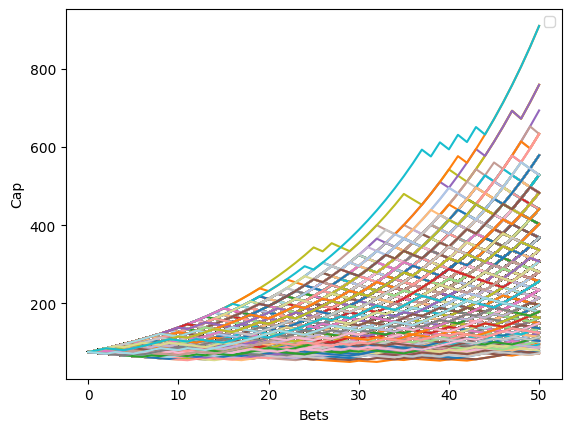

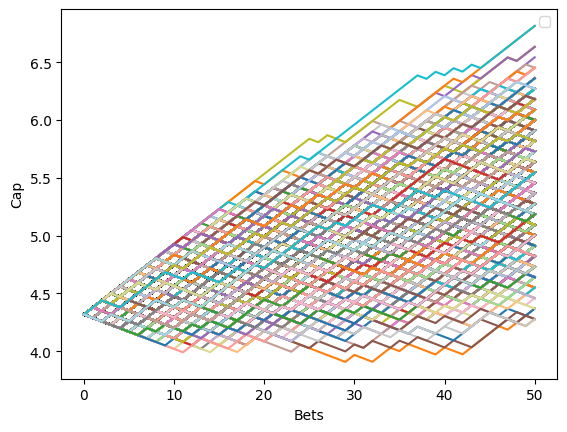

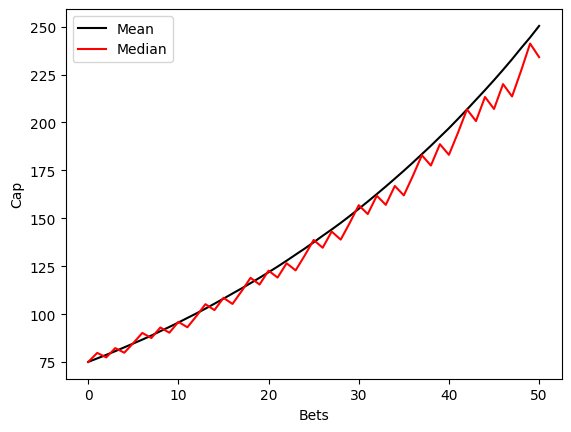

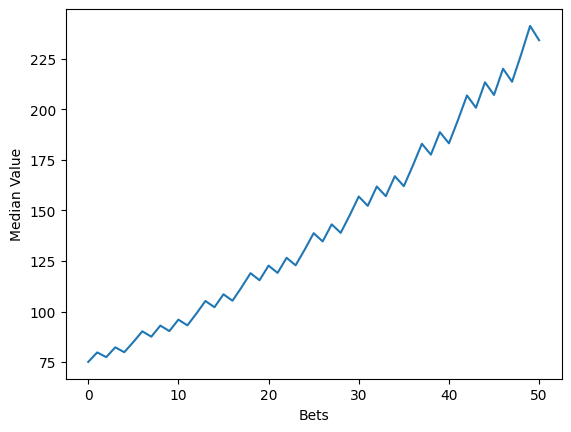

In [ ]:
# kelly criterion from chatgpt
df = pd.DataFrame(caps_li_g).T
print ('Capital Median - >',
      df.median(axis = 1).iloc[-1],', Capital Mean -> ',
      df.mean(axis = 1).iloc[-1])
print('Growth rate Median ->',
      pd.DataFrame(gr_rate_g).median().iloc[0], 'Growth rate Mean ->',
      pd.DataFrame(gr_rate_g).mean().iloc[0] - 1
  )
results(caps_li_g,gr_rate_g, 'Geometric')

Capital Median - > 448917.4298083279 , Capital Mean ->  2516138102.0295763
Growth rate Median -> 5977.590586791712 Growth rate Mean -> 33509411.03010847


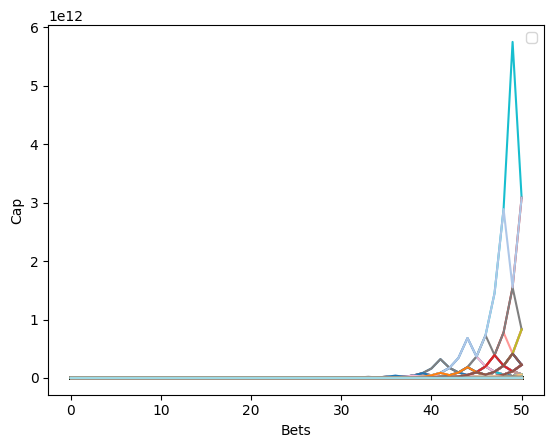

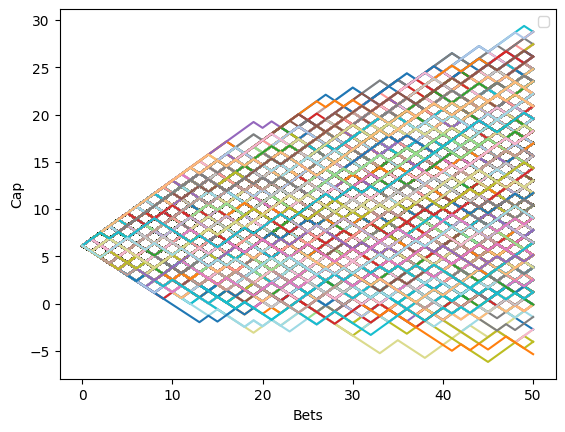

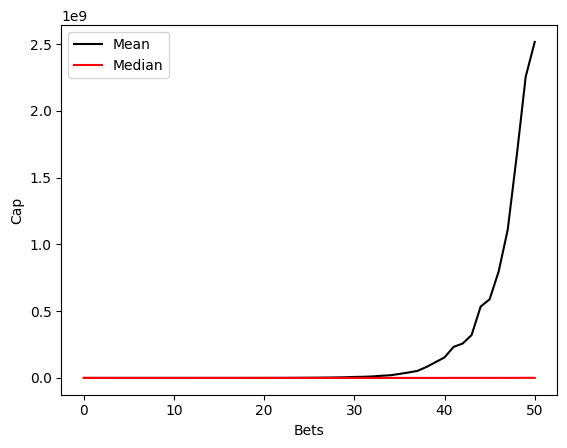

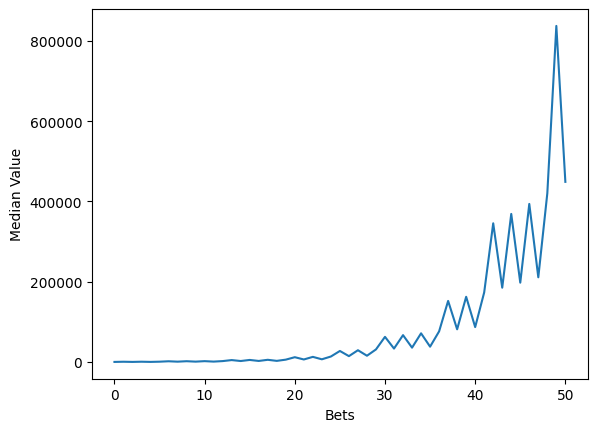

In [ ]:
# for fun trying out what happens if we consider optimal kelly fraction plus + some value to check if
# the growth rate median goes down or not from the case 1 of optimal kelly criterion strategy?

df = pd.DataFrame(caps_li_fun).T
print ('Capital Median - >',
      df.median(axis = 1).iloc[-1],', Capital Mean -> ',
      df.mean(axis = 1).iloc[-1])
print('Growth rate Median ->',
      pd.DataFrame(gr_rate_fun).median().iloc[0], 'Growth rate Mean ->',
      pd.DataFrame(gr_rate_fun).mean().iloc[0] - 1
  )
results(caps_li_fun, gr_rate_fun, 'Geometric')

The one with the chat-gpt, the mean of the growth rate is not acceptable to be a valid strategy. And the thing that we tried for fun in the third case is verified. The Growth rate median in case 1 with Kelly optimized fraction is greater than in case 3 which shows that the simulation follows the graph given below for demonstration purposes as growth vs fraction.

A few notes on the exercise above. The above exercise is written by a human so it may contain errors. Please exercise caution. The reason for not generating from the free version of chat-gpt is that it becomes complicated to get the exact requirement that we need. One can achieve this using the free version of chat-gpt by giving and combining multiple prompts and responses respectively. We simulated the strategy and got the results. The respective results are displayed above.

In the following exercises, we are going to play with accuracy and risk-reward ratio to mitigate and understand the risk involved in implementing this strategy.



In [ ]:
def kelly_criterion_gpt(p, b, a):
    q = 1 - p
    #kelly_fraction_gpt = (accuracy * expected_return - (1 - accuracy)) / expected_return
    f = (p*b - q)/b
    return f

def kelly_criterion(p, b, a):
    q = 1 - p
    f = (p/a - q/b)
    return f

p = 0.5833333333333334
initial_capital = data.iloc[0].Close     # we are buying only one stock , so we are considering the starting price.
b = 12.113929748535156/initial_capital
a = 5.669999694824218/initial_capital
print('Original Case')
print(p,b,a)
print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p,expected_return, a))
print()
print('Only accuracy increase')
p = 0.6833333333333334
print(p,b,a)
print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p,expected_return, a))
print()
print('Only reducing Reward')
p = 0.5833333333333334
b = 10.113929748535156/initial_capital
a = 5.669999694824218/initial_capital

print(p,b,a)
print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p,expected_return, a))
print()
print('Only reducing risk')
p = 0.5833333333333334
b = 12.113929748535156/initial_capital
a = 2.669999694824218/initial_capital
print(p,b,a)
print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p,expected_return, a))
print()
print('Only reducing Reward close to risk')
p = 0.5833333333333334
b = 6.669999694824218/initial_capital
a = 5.669999694824218/initial_capital
print(p,b,a)
print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p,expected_return, a))

print()
print('Downplaying the accuracy with the above')
p = 0.50
b = 6.669999694824218/initial_capital
a = 5.669999694824218/initial_capital
print(p,b,a)
print(kelly_criterion(p, b, a))
print(kelly_criterion_gpt(p,expected_return, a))

Original Case
0.5833333333333334 0.1613308407173475 0.0755118971813179
5.142367482266181
0.3883099245894365

Only accuracy increase
0.6833333333333333 0.1613308407173475 0.0755118971813179
7.086506400482313
0.5351155426879717

Only reducing Reward
0.5833333333333334 0.13469524944906297 0.0755118971813179
4.631649176910116
0.3883099245894365

Only reducing risk
0.5833333333333334 0.1613308407173475 0.03555851027889112
13.822202196935523
0.3883099245894365

Only reducing Reward close to risk
0.5833333333333334 0.08882969281546015 0.0755118971813179
3.0344282648842222
0.3883099245894365

Downplaying the accuracy with the above
0.5 0.08882969281546015 0.0755118971813179
0.9927246562277183
0.2659719095073237


Playing with these three variables only one can generate immense insights about how to handle risk using the Kelly criterion using approximation. In the real world, accuracy is highly related to your strategy.Get the average reward and average risk of your strategy that is achievable with every trade as expected values. Then you can find the combination of these three variables that makes you feel comfortable while investing. The Condition here while investing is to maintain discipline, and the ability to stick to the investment plan you came up with. These variables like the risk-to-reward ratio that you set are the rules of the game that you may agree upon to achieve the end capital that you expect to reach. Deviating from the discipline you may not reach your target.

By playing with these variables, one can reach a strategy that may suit your mindset and be okay with investing and trading. It is up to you how to do it. The investment mentality and risk appetite vary from person to person.

For example, as you can see the spike in the graphs when following the trading strategy discipline, gives a person an advantage where and which trade has the highest probability of going right to increase the bet size if you look at the spikes in the growth median graph. Trading Discipline can or may give reference and provide insight into the next trade being a success or a failure. This approach can be related to the Bayesian approach combined with Monte Carlo for dynamic position sizing. Possibilities are infinity to approach a problem by combining different tools, techniques, and approaches. You are free to choose any.

One more point, investing a little less than Kelly's optimal strategy does not mean that you may not make a profit other than the optimal fraction. There are multiple graphs for growth rate G(f) vs fraction represented in the references provided. It begins with 0 and achieves the f* and after that it drops below zero. Anywhere in the upper quadrant, there is the possibility of making money.

A similar one is plotted below.


5.142367482266181


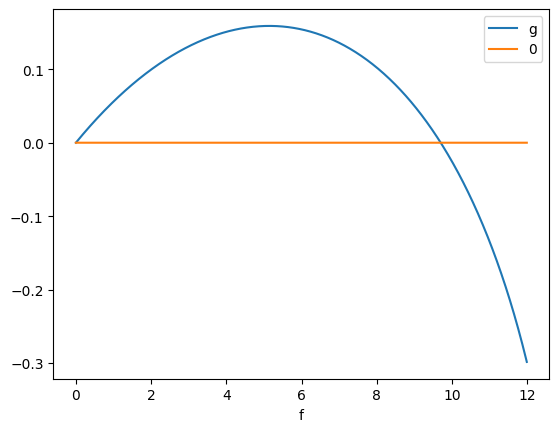

In [ ]:
li = []
# demonstration
p = 0.5833333333333334
initial_capital = data.iloc[0].Close     # we are buying only one stock , so we are considering the starting price.
b = 12.113929748535156/initial_capital
a = 5.669999694824218/initial_capital
for f in [i/100 for i in range(0,1200)]:
    li.append([ f, ((1 + f*b)**p * (1 - f*a)**(1-p) )-1, 0])
pd.DataFrame(li, columns = ['f','g','0']).plot(x = 'f')
q = 1 - p
f = (p/a - q/b)
print(f)
# F printed is the point where growth rate is maximized

Our Opinion to our users is if you are new to investing, your goal should not solely be to maximize money made out of financial markets. generally, the ultimate goal of new investors should be understanding the moment of price for that particular instrument residing in a particular financial market. And that is increasing the accuracy of the strategy you came up with. And for that, you need to stay in the financial markets to get experience. To do that, you need to maximize the ability to stay in the financial markets as long as possible and avoid getting your entire capital wiped out while keeping track of the state, and variables of the financial markets that affect the price movements of the instruments that you are interested in.

You can play with the variables discussed in the above discussion to get the strategy that minimizes Losses on each trade.


Special cases:
f < 0
A minus sign in position sizing denotes the strategy is very bad. The combination of accuracy and the risk-to-reward ratio we provided to the Kelly criterion does not provide any expected return.

It says that the potential risk outweighs the potential rewards to such an extent that the optimal strategy is to refrain from taking any position. It signals to revisit our strategy and check for areas of improvement.

f > 1:

It suggests using more than our capital. In the practical world, it means leverage. But it does not mean with 100 % certainty you should use leverage to make the maximum return possible on that strategy. Simple Reason, there is no way the market will have constant conditions. As Financial markets are constantly evolving, there is a high possibility that the variables we have considered till now, the ones we have not, and the ones that we don't know about are bound to change. So, in our opinion, one should leave some margin of Safety instead of flying too close to the sun. Now Margin of Safety, by how much? More research is needed. It depends on many variables and believe us that list is too long.

F greater than 1 suggests an attractive opportunity, our opinion on the usage of leverage is to use only when you are not just sure but SURE SURE sure! The reasons are higher risk and volatility associated with the trades and strategy. This means the state of the markets and the variables related, unrelated, considered, and ignored in the above phases can change at any point in time, affecting your real accuracy, real reward, and real Risk offseting your Kelly fraction in real time, If you go through Kelly criterion as risk management strategy. There are many other types of managing Risk as well. Topics for other documents.




# Leverage
Definition: Leverage refers to the use of borrowed funds or financial instruments to increase the potential return on an investment. It allows investors to control a larger position with a smaller amount of capital.

Pros:
*	Increased Returns
*	Access to larger positions
*	Higher diversification

Cons:
*	Magnified Losses
*	Margin Calls
*	Increased Stress and Risk

Leverage is considered a double-edged sword: It amplifies returns, but also amplifies losses. It’s industry knowledge that leverage is not suitable for investors with limited experience and low-risk tolerance. Leverage is a powerful tool, but it should be used with caution and a clear understanding of
the risks involved.

Real World Scenarios:
If you operate on a risk-reward ratio-based strategy, how does leverage operate in your case? The answer to this question is fairly complicated and more research is needed. But for now, we will try to cover the basics and give a higher overview.

Suppose we considered a USD 100 investment with a 2:1 risk-to-reward ratio and applied 10 X leverage that gives us the position of USD 1000 accounting for 10 shares worth USD 100 each. Now assume that investment has fallen to USD 90. You lost USD 10 per share. Which comes out to a total of USD 100. Your capital is wiped out entirely in a single trade. This is scary. And assume it goes in your favor. You made USD 20 on each trade where you risked 10 USD to get 20 USD using a ratio of 2:1. On the second bet, you exercise the same. USD 300 with leverage gives USD 3000 enabling you to buy 30 shares worth USD 100 and you invest in it. But this time the investment goes from USD 120 to USD 110. A USD 10 loss per share which amounts to USD 300. In conclusion, it takes one bad trade to wipe out your entire capital with the above setting. This is the scary part about leverage.

We as a human being are risk averse. The intensity of hate, depression, and stress emotions is 10 X that of the happiness of winning a trade for the above setup. There is no metric to measure emotions. We made that up with the setup in the above example to emphasize the following point. We hate losing more than we love winning.

And in financial markets, there is NOT an entity in existence that could claim that they were 100 % accurate in predicting or implementing an investment strategy. No matter how experienced an investor is, everyone has faced some kind of errors, and losses along their journey in investing.

By combining all the assumptions and industry facts above, it does not take a genius to figure out that the entire game of investing is not to make money quickly but to minimize losses as much as possible.


# More Questions and Answers.
Now, most of us will have this question after what we discussed, should we not use leverage then? If leverage is so harmful, why is it made available to implement in our strategy in the first place? We will answer the second question first to place the context of the following discussion. There may be several reasons why service providers may provide leverage to their users and investors to implement in financial markets by intermediaries. Some of them are good and some of them are bad. To give you a glimmer of the bad size. Search for the following terms. CFD, FEMA Act, and Rbi Alert list where Rbi stands for Reserve Bank of India. To keep this discussion as healthy as possible, we won’t be discussing the bad side, or intentions for providing leverage. We will discuss the good side. Which brings us back to the first question.

Should we even use leverage or not? To answer this question, we would like to place an industry-stated belief about using leverage. The belief says that leverage is not a suitable tool for all investors, especially those with a low-risk tolerance and LIMITED Experience. The belief also states that thorough research and risk management are crucial before using leverage.

We have tried our best to describe the basic risk management tools, techniques, concepts, research, and algorithms under our guide section. We will be researching risk management in detail in the future. But for now, we would like to give you our understanding of how one can research to use leverage in their investment strategies.

One should be clear with the definition of what risk management means. Risk management on a higher level is nothing but how much loss/risk you are ready to suffer to get that reward so that you are "desired okay" at the end of your investment journey every time you invest.

In the above example that we discussed, the investor was ready to bet his entire capital to get twice his capital on each trade he gets. In this setup, it’s obvious that it takes one bad trade to lose it all reducing the investor to lunacy. Hence, to use leverage, the investor should be very careful while designing their strategy and incorporate the variable of using leverage. If the investor decides to use leverage, it affects the investor’s entire investment strategy including from phase one to phase three in G-BIA.

Disclaimer: Please note that the simulation done in this notebook focuses on calculating the maximum profit that could be achieved by most of the population. That is basically what the growth rate median means. This simulation is done to come up with the position sizing that gives a majority of the population a higher chance of having a positive growth rate given the setup. The leverage scenario is completed and DISREGARDED in the above simulation.

Back to our Q&A discussion.

The question is how one should go about designing a strategy that incorporates the concept of leverage. The answer to this question is fairly complex and needs more research. We can give a basic understanding of how one can approach this problem. Let’s begin. In the above example, the investment fluctuated by USD 10 range. The variance in the investment exposed the investor to risk its entire capital. So this gives an insight to either choose lower variance investment or reduce leverage to reduce the overall losses/risk while one is using leverage. This means one needs to maintain a list of variables that could amplify the losses in their strategy if leverage is introduced in the investment strategy. Currently, we do not have that list of variables that are affected by introducing leverage as it may depend on the style of the investing practice by the investors.

List of variables that may be affected and need to keep an eye on by incorporating leverage in your strategy.
* Variance of the instruments for asset selection
* Risk-reward ratio
* Balancing between the leverage size and the accepted risk with each position size.
* Liquidity

The most important question that needs to be answered here is how much percentage of the budget/Capital can you as an investor be ready to lose/sacrifice when a trade turns bad when you are using leverage so that you are desired okay at the end of your entire investment journey? This question can be answered in many ways. We can suggest one of the basic ways to answer this question. An investor should maintain 2 different risk-reward ratio metrics while using leverage. This might confuse you. We are suggesting when an investor is practicing leverage in their investment strategy. One can maintain 2 risk-reward ratios, one risk-reward ratio on a lower level, and one assuming leverage is used. With this setup, the investor can track the losses caused to his capital and the second one will help to track the reward while using leverage. This methodology gives investors the ability to backtest their strategy and helps them find the right leverage size and optimize risk to the risk-to-reward ratio of how much one is ready to sacrifice the capital for a certain reward. For example, In the example we discussed above, let 2:1 be the second risk-to-reward ratio that is used to calculate the Kelly criterion where the condition gives out the fraction of using 10. So how to set the first risk-to-reward ratio that keeps track of the loss of capital. One can disregard the reward on the lower level and only focus on the risk of how much I am willing to sacrifice the capital on a bad trade for this particular strategy for that dedicated instrument. This approach gives the investor the ability to backtest and optimize respective parameters. This is one of many ways an investor can approach to optimize their strategy and reduce losses which may or may not suit your style of investing.

Risk management becomes complicated even more when leverage is introduced to a portfolio consisting of multiple instruments. The process needs to be replicated to each instrument and check if it suits the investment inspecting each variable that amplifies losses. It becomes even more complicated when you include the variable change caused by Dynamic market-changing conditions. One needs to re-verify and make the necessary adjustments in the parameter that is ultimately dedicated to reducing losses/risk when there is a huge change in the market conditions.


# Real world scenerios and simulations

In [ ]:
# THEEE most important simulations

In this section, we will be performing a risk analysis of the strategy we have worked on from the above discussion. For this simulation, we will be using the Monte Carlo approach.

Monte Carlo simulation is a computational technique used to approximate the probability of certain outcomes by running a large number of random trials, often referred to as Monte Carlo experiments. Monte Carlo simulation can be used to estimate the expected value of a system or a process which in our case is the strategy's end capital growth median rate by simulating a large number of trials. Estimated Expected value in our cases and most other cases are mean or average of the outcome. This Expected value provides valuable information about the central tendency of the outcomes. But in the case of investing, the one with profitability becomes an outlier and does not tell the whole story. Our simulation wants to maximize the profitability of the masses. Hence instead of mean, median would be a preferable metric.

The flow of the simulation will generate different outcomes and take an average to get the expected value focusing on the median rather than the mean for outcomes. We want the simulation to give insights into where the maximum population is profitable. Each different outcome simulated in below Monte Carlo simulation below can be considered as a journey. But first, let's start with the basics. The algorithm for a single investor's journey is displayed below.


In [ ]:
#base algorithm for a particular investors journey which later will be represented as funtion below
import math

def position_size(p,b,a):
  return 10                                                       # Assuming 10 times leverage

data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')
no_shares = 10
num_bets = 10
share_price = data.iloc[0].Close
initial_capital =  share_price * no_shares   # initial base Amount of your investment account

# storing
cap_li = []
bet_sizes = []
no_sharess = []
pnl = []

base_capital = initial_capital               # base capital on which leverage is provided.
b = 12.113929748535156/share_price           # win payout % per share
a = 5.669999694824218/share_price            # loss payout % per share
p = 0.5833333333333334                       # strike rate of the strategy %/100, accuracy
                                             # taken from the above strategy
f = position_size(p,b,a)                     # position Sizing function

cap_li.append(base_capital)
pnl.append(0)
for _ in range(num_bets):                                     # simulating multiple trades in loop
  bet_size = base_capital * f                                 # using leverage and then investing if f > 1
  no_shares = math.floor(bet_size / share_price)              # getting number of share by the amount invested
  outcome = np.random.choice([0, 1], p=[1 - p, p])            # getting random win loss indication based on strike rate
  if outcome == 1:                                            # in case of sucess
    pnl.append(share_price * b * no_shares)                   # profit for this trade
    base_capital = share_price * b * no_shares + base_capital # adding magnified profit to base capital
  else:
    pnl.append(- share_price * a * no_shares)                 # loss for this trade
    base_capital = -share_price * a * no_shares+ base_capital # subtracting magnified loss from the base capital
  if base_capital <= 0 :                                      # breaking in case of bankrupcy
    cap_li.append(0)
    bet_sizes.append(0)
    no_sharess.append(0)
    break
  bet_sizes.append(bet_size)
  cap_li.append(base_capital)
  no_sharess.append(no_shares)                                # looping till the loop is over Num_bets
if base_capital > 0:
  bet_sizes.append(base_capital* f)
  no_sharess.append(math.floor(base_capital* f / share_price))




[*********************100%%**********************]  1 of 1 completed


In [ ]:
print("A random single investor's journey with the above setting for the discussed strategy with final capital -> ", base_capital)
pd.DataFrame([
    cap_li,
    bet_sizes,
    pnl,[0]+[str((x - y)/y*100) +' %' for x, y in zip(cap_li[1:], cap_li[:-1])],
    no_sharess
    ]).T.rename(columns = {0 : 'Base_capital', 1:'Leverage_used', 2:'Profit_or_Loss', 3: '% portfolio gain or loss',4:'No of Shares per trade'})

A random single investor's journey with the above setting for the discussed strategy with final capital ->  10.103028869628577


,Base_capital,Leverage_used,Profit_or_Loss,% portfolio gain or loss,No of Shares per trade
0,750.875015,7508.750153,0.0,0.0,100.0
1,1962.26799,19622.679901,1211.392975,161.33084071734748 %,261
2,482.39807,4823.980698,-1479.86992,-75.41630031198873 %,64
3,119.518089,1195.180893,-362.87998,-75.224177544262 %,15
4,301.227036,3012.270355,181.708946,152.03468136140162 %,40
5,785.784225,7857.842255,484.55719,160.8611222764152 %,104
6,2045.632919,20456.329193,1259.848694,160.3301075564272 %,272
7,503.393002,5033.930023,-1542.239917,-75.39182139830066 %,67
8,123.503023,1235.030228,-379.88998,-75.46588407127544 %,16
9,32.783028,327.830276,-90.719995,-73.4556880352563 %,4


Now we will be simulating 1000 investors possible journey using monte carlo simulations for a specific setup that is dedicated to simulating risk of our above discussed strategy.

In [ ]:


def position_size(p,b,a):
  return (p/a - (1-p)/b)                                                        # testing kelly criterion

def Investor_journey( share_price, no_shares, p, b, a, num_bets):
  base_capital = 0
  initial_capital =  share_price * no_shares
  cap_li = []
  bet_sizes = []
  no_sharess = []
  pnl = []

  base_capital = initial_capital               # base capital on which leverage is provided.
  f = position_size(p,b,a)                     # position Sizing function

  cap_li.append(base_capital)
  pnl.append(0)
  for _ in range(num_bets):                                     # simulating multiple trades in loop
    bet_size = base_capital * f                                 # using leverage and then investing if f > 1 else fraction
    no_shares = math.floor(bet_size / share_price)              # getting number of share by the amount invested
    outcome = np.random.choice([0, 1], p=[1 - p, p])            # getting random win loss indication based on strike rate
    if outcome == 1:                                            # in case of sucess
      pnl.append(share_price * b * no_shares)                   # profit for this trade
      base_capital = share_price * b * no_shares + base_capital # adding magnified profit to base capital
    else:
      pnl.append(- share_price * a * no_shares)                 # loss for this trade
      base_capital = -share_price * a * no_shares+ base_capital # subtracting magnified loss from the base capital
    if base_capital <= 0 :                                      # breaking in case of bankrupcy
      cap_li.append(0)
      bet_sizes.append(0)
      no_sharess.append(0)
      return base_capital,cap_li, bet_sizes, pnl, no_sharess
    bet_sizes.append(bet_size)
    cap_li.append(base_capital)
    no_sharess.append(no_shares)                                # looping till the loop is over Num_bets
  bet_sizes.append(base_capital* f)
  no_sharess.append(math.floor(base_capital* f / share_price))
  return base_capital, cap_li, bet_sizes, pnl, no_sharess


# setup settings
b = 12.113929748535156/share_price           # win payout % per share
a = 5.669999694824218/share_price            # loss payout % per share
p = 0.5833333333333334                       # strike rate of the strategy %/100, accuracy

data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')
no_shares = 10
num_bets = 10                               # no of trades
share_price = data.iloc[0].Close
initial_capital =  share_price * no_shares

# monte carlo driver program
monte = 10000
fin_cap, cap_li_li, bet_sizes_li, pnl_li, no_shares_li = [],[],[],[], []
gr_rate = []                                                    # storing growth rate

for i in range(monte):
  final_capital, cap_li, bet_sizes, pnl, no_sharess = Investor_journey( share_price, no_shares, p, b, a, num_bets)
  fin_cap.append(final_capital)
  gr_rate.append((final_capital - initial_capital)/(initial_capital))
  cap_li_li.append(cap_li)
  bet_sizes_li.append(bet_sizes)
  pnl_li.append(pnl)
  no_shares_li.append(no_sharess)
  if i%(monte/10) == 0:
        print(i)

[*********************100%%**********************]  1 of 1 completed


0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [ ]:
df = pd.DataFrame(cap_li_li).T
df = df.fillna(0)
df  # 10000 possible different scenerio based on the setup described

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,...,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015,750.875015
1,461.705031,461.705031,1368.685432,461.705031,1368.685432,461.705031,461.705031,1368.685432,461.705031,461.705031,...,1368.685432,461.705031,1368.685432,1368.685432,461.705031,1368.685432,1368.685432,461.705031,1368.685432,1368.685432
2,285.935040,285.935040,2495.280899,837.236853,841.375461,285.935040,285.935040,841.375461,285.935040,837.236853,...,2495.280899,285.935040,841.375461,2495.280899,837.236853,2495.280899,2495.280899,837.236853,2495.280899,841.375461
3,516.099706,516.099706,4554.648956,1527.730849,1531.869456,516.099706,516.099706,1531.869456,516.099706,1527.730849,...,4554.648956,516.099706,1531.869456,1531.380951,1527.730849,1531.380951,4554.648956,514.046870,1531.380951,518.185478
4,940.087247,317.649716,2791.279051,2787.579543,942.189488,940.087247,940.087247,2791.718150,317.649716,2787.579543,...,8322.081108,317.649716,942.189488,2791.229645,2787.579543,2791.229645,2791.279051,938.034412,2791.229645,319.735489
5,577.207266,572.042241,1708.309109,5089.226195,1717.480992,577.207266,1715.378751,1708.748209,198.579723,5089.226195,...,15214.907135,572.042241,1717.480992,5104.990227,5089.226195,5104.990227,5105.039633,1713.325916,1708.259703,200.665495
6,356.077278,1044.485501,1050.589145,3116.066301,1054.091028,356.077278,1051.988786,1045.358244,356.060809,3116.066301,...,9312.437453,1044.485501,3134.810773,3126.160333,9304.873747,9332.751709,3126.209740,3130.655696,3113.475554,126.955499
7,219.997285,641.915523,648.019167,5696.333337,1926.293970,219.997285,1924.191728,642.788266,646.795123,5696.333337,...,5700.647647,641.915523,5727.191739,5718.541299,17021.446997,5709.621904,5718.590706,5723.036662,5693.742590,81.595502
8,134.947290,1162.814502,1181.032076,10420.765939,3513.218767,134.947290,3511.116525,1175.801175,1179.808032,10420.765939,...,10425.080249,398.105536,10475.852200,10455.087831,31134.175154,3492.652023,10455.137238,3506.066782,10406.061263,142.165150
9,83.917293,2119.814952,2150.146455,19057.997850,2152.418840,83.917293,6418.459665,2144.915555,2148.922412,19057.997850,...,6382.370467,725.181639,6410.462419,6395.368050,56961.073378,6387.881233,19128.710938,6413.409921,6369.021480,91.135153


In [ ]:
# You can check the nth investor's journey ranging  1-9999
n = 9999
print("A random single investor's journey with the above setting for the discussed strategy with final capital -> ", fin_cap[n])
pd.DataFrame([
    cap_li_li[n],
    bet_sizes_li[n],
    pnl_li[n],
    [0]+[str((x - y)/y*100) +' %' for x, y in zip(cap_li_li[n][1:], cap_li_li[n][:-1])],
    no_shares_li[n]
    ]).T.rename(columns = {0 : 'Base_capital', 1:'Leverage_used', 2:'Profit_or_Loss', 3: '% portfolio gain or loss',4:'No of Shares per trade'})


A random single investor's journey with the above setting for the discussed strategy with final capital ->  3899.832646179198


,Base_capital,Leverage_used,Profit_or_Loss,% portfolio gain or loss,No of Shares per trade
0,750.875015,3861.275262,0.0,0.0,51.0
1,461.705031,2374.256937,-289.169984,-38.51106756247213 %,31
2,837.236853,4305.379568,375.531822,81.33587401796247 %,57
3,1527.730849,7856.153438,690.493996,82.47295770244276 %,104
4,2787.579543,14334.758394,1259.848694,82.46535670368765 %,190
5,5089.226195,26170.671294,2301.646652,82.56792737556152 %,348
6,3116.066301,16023.958019,-1973.159894,-38.77131450414232 %,213
7,1908.356366,9813.469721,-1207.709935,-38.7575172782363 %,130
8,3483.167233,17911.725916,1574.810867,82.52184421077729 %,238
9,6366.282513,32737.76418,2883.11528,82.77280667455713 %,435


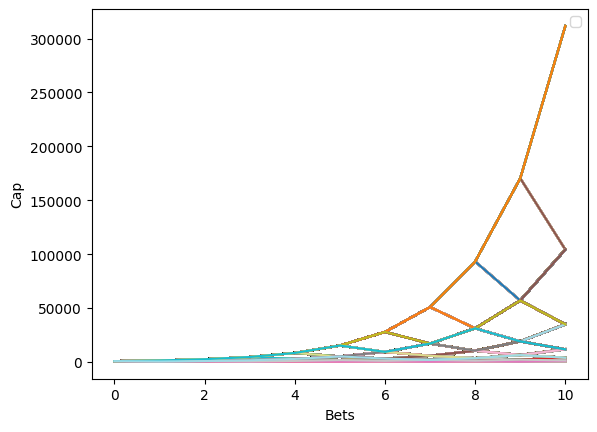

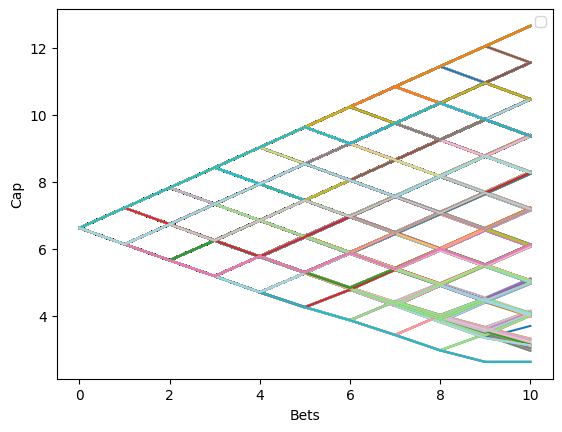

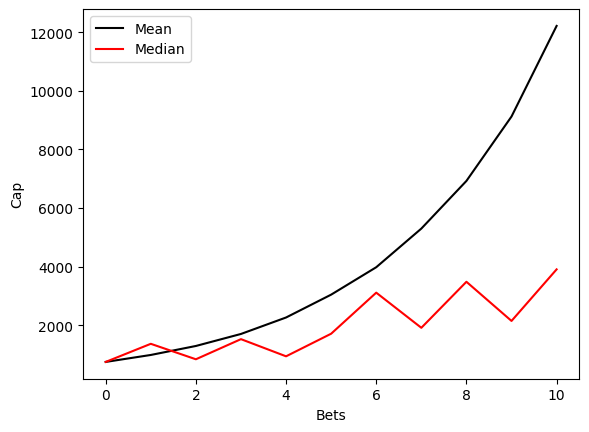

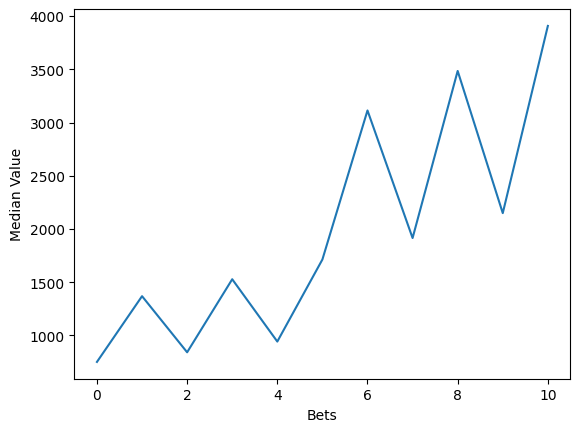

In [ ]:

# [:len(pd.DataFrame(df.iloc[10])[10])]
import matplotlib.pyplot as plt
import pandas as pd
def results(caps_li,gr_rate, strategy):
  df = pd.DataFrame(caps_li).T
  df = df.fillna(0)
  colors = plt.cm.tab20.colors
  for i, column in enumerate(df.columns):
      plt.plot(df.index, df[column], label=column, color=colors[i%20])
  plt.xlabel('Bets')
  plt.ylabel('Cap')
  plt.legend([])
  plt.show()
  if strategy != 'Additive':
    dff = np.log(pd.DataFrame(caps_li)).T
    colors = plt.cm.tab20.colors
    for i, column in enumerate(dff.columns):
        plt.plot(df.index, dff[column], label=column, color=colors[i%20])
    plt.xlabel('Bets')
    plt.ylabel('Cap')
    plt.legend([])
    plt.show()
  else:
    print(' No need for logarithmic view for Additive Investment strategies -> ')

  plt.plot(df.index, df.mean(axis = 1), label='Mean', color='black')
  plt.plot(df.index, df.median(axis = 1), label='Median', color='red')

  plt.xlabel('Bets')
  plt.ylabel('Cap')
  plt.legend()
  plt.show()
  df.median(axis = 1).plot()
  plt.ylabel('Median Value')
  plt.xlabel('Bets')

  # Show the plot
  plt.show()
results(cap_li_li,gr_rate, 'Geometric')

In [ ]:
print ('Capital Median - >',
      df.median(axis = 1).iloc[-1],', Capital Mean -> ',
      df.mean(axis = 1).iloc[-1])
print('Growth rate Median ->',
      pd.DataFrame(gr_rate).median().iloc[0], 'Growth rate Mean ->',
      pd.DataFrame(gr_rate).mean().iloc[0] - 1
  )

Capital Median - > 3910.0913665771473 , Capital Mean ->  11998.241957957429
Growth rate Median -> 4.207379773089846 Growth rate Mean -> 13.979013436506825


Please note, the share_price is kept constant for simplicity. One can try to increase and decrease the share price if one wants to resemble more in the real-world scenario. One way to do it is using probability distribution that the instrument that you are invested in follows and changes in the Investor function loop of num_bets and changes the share_price according to the behavior you want to simulate of that instrument. You are free to use any.

As one can notice, we got the growth median rate for following Kelly's criterion as position sizing.

In the above simulation that we did, we can say we have performed level 1 of basic risk management, and risk analysis given the uncertainty parameters calculated from the strategy from the core market analysis of the G-BIArchitecture.

 Level 2 would be optimizing the risk analysis, above the simulation by playing with different parameters and seeing what effects it has on our strategy. which we tried to do our best concerning optimization.

 The following simulation will check growth rate median for different position sizing checking position sizing from 0-10


In [ ]:
from IPython.display import clear_output
def position_size(p,b,a):
  return (p/a - (1-p)/b)                                                        # testing kelly criterion

def Investor_journey( share_price, no_shares, p, b, a, num_bets, position_size):
  base_capital = 0
  initial_capital =  share_price * no_shares
  cap_li = []
  bet_sizes = []
  no_sharess = []
  pnl = []

  base_capital = initial_capital               # base capital on which leverage is provided.
  # f = position_size(p,b,a)                     # position Sizing function
  f = position_size
  cap_li.append(base_capital)
  pnl.append(0)
  for _ in range(num_bets):                                     # simulating multiple trades in loop
    bet_size = base_capital * f                                 # using leverage and then investing if f > 1
    no_shares = math.floor(bet_size / share_price)              # getting number of share by the amount invested
    outcome = np.random.choice([0, 1], p=[1 - p, p])            # getting random win loss indication based on strike rate
    if outcome == 1:                                            # in case of sucess
      pnl.append(share_price * b * no_shares)                   # profit for this trade
      base_capital = share_price * b * no_shares + base_capital # adding magnified profit to base capital
    else:
      pnl.append(- share_price * a * no_shares)                 # loss for this trade
      base_capital = -share_price * a * no_shares+ base_capital # subtracting magnified loss from the base capital
    if base_capital <= 0 :                                      # breaking in case of bankrupcy
      cap_li.append(0)
      bet_sizes.append(0)
      no_sharess.append(0)
      return base_capital,cap_li, bet_sizes, pnl, no_sharess
    bet_sizes.append(bet_size)
    cap_li.append(base_capital)
    no_sharess.append(no_shares)                                # looping till the loop is over Num_bets
  bet_sizes.append(base_capital* f)
  no_sharess.append(math.floor(base_capital* f / share_price))
  return base_capital, cap_li, bet_sizes, pnl, no_sharess


def Monte_carlo_simulation(position_size):
  monte = 10000
  fin_cap, cap_li_li, bet_sizes_li, pnl_li, no_shares_li = [],[],[],[], []
  gr_rate = []                                                    # storing growth rate

  for i in range(monte):
    final_capital, cap_li, bet_sizes, pnl, no_sharess = Investor_journey( share_price, no_shares, p, b, a, num_bets,position_size)
    fin_cap.append(final_capital)
    gr_rate.append((final_capital - initial_capital)/(initial_capital))
    cap_li_li.append(cap_li)
    bet_sizes_li.append(bet_sizes)
    pnl_li.append(pnl)
    no_shares_li.append(no_sharess)
    if i%(monte/10) == 0:
          print(i)
  return fin_cap, gr_rate, cap_li_li, bet_sizes_li, pnl_li, no_shares_li



data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')
no_shares = 10
num_bets = 10                               # no of trades
share_price = data.iloc[0].Close
initial_capital =  share_price * no_shares
# setup
b = 12.113929748535156/share_price           # win payout % per share
a = 5.669999694824218/share_price            # loss payout % per share
p = 0.5833333333333334                       # strike rate of the strategy %/100, accuracy

dic = {}
for i in range(101):
  print(i/10)
  dic[i/10] = Monte_carlo_simulation( i / 10 )
  clear_output(wait = True)
print('done')

done


In [ ]:
li = []
for key, val in dic.items():
  li.append([key, pd.DataFrame(val[1]).median().iloc[0]])
print('done')

done


Optimal point [position_size, and growth median rate] [5.6, 4.240720511520727]


<Axes: xlabel='position_size'>

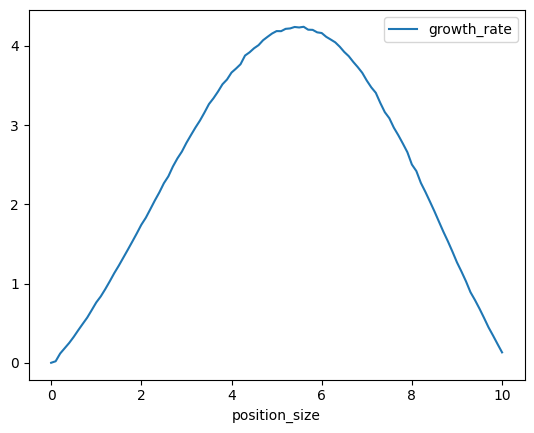

In [ ]:
gr = pd.DataFrame(li, columns =  ['position_size', 'growth_rate'])
print('Optimal point [position_size, and growth median rate] '+str(list(gr[gr.growth_rate == gr.growth_rate.max()].iloc[0])))
gr.plot(x = 'position_size', y = 'growth_rate')

We have not considered transaction charges applied by brokers, leverage_usage charges, market liquidity for entry-exit ease, and many other variables, this output is far from perfect. And missing many variables. This whole notebook is for educational purposes only and please verify the results by yourself and exercise caution. Be careful. Please focus on the next discussion.

Just like any other student who does research for their respective projects. Just like the rest, we as a student have attended N number of lectures that we have lost count of. One learning that we got from those lectures was whatever the quality of the lecture may be. Whether it is informative, boring, life-changing or that ignites the student with curiosity. The last 10 minutes of the lecture are the most important part of that lecture as there are conclusions, and key takeaways included that help students for comprehension and retention. Unfortunately, most of the students feel fatigued towards the end of the lecture and in our experience, we have noticed the most weighted questions in the examinations were picked from whatever was taught in the last ten minutes. The below discussion highlighted between “#####  content  ######” is like those 10 minutes for this document. The following discussion does not summarize anything but gives you the details about the practicality of the above simulations that we did with more simulations. We request you to please focus.

##########################################################################


As you may have noticed above from the edited simulations. We designed an algorithm that simulated a journey for a strategy that had a certain hit rate/accuracy, the payout for winning and losing in the form of Risk to reward ratio and using some basic concepts of Monte Carlo and central tendency of statistics. We calculated the growth rate which had an intention of the majority of the folks staying on the right side of the market by taking the median and not the mean.

So the above simulation holds that has a high possibility of staying on the right side of the market in case where you are expected to follow the conditions that we provided to the simulation like the accuracy, risk-reward ratio, trading hygiene, discipline, and many other variables that affect an investor’s journey. While creating this document, we can see the Grammarly prompt which says “To err is human, edit, divine”. Unfortunately, an investor is a human being. Mistakes are an inherent aspect of the human experience. We are not perfect and make mistakes. And in our case, there is a high possibility that an investor may make a mistake. It's very difficult or next to impossible to follow through a planned-out strategy in a dynamic environment like financial markets.

In our opinion, the Kelly criterion is a class of an ideal case of investing strategy which has a high possibility of not being able to achieve in real-life investing. The reasons are as follows.
* Error in the assumption of probabilities and payoffs.
* Aggressive bet sizing leads to un-real risk tolerance.
* Dynamic changes in market conditions like disruptions etc, are the main reason.
* Then there are human biases, emotions, and influenced decision-making leading investors to deviate from their strategy to some riskier asset in the hope of making a quick buck decreasing your end capital and the growth rate of your investment journey.
*And many other reasons,

Due to the above assumptions, it becomes quite difficult for many and somewhat impossible for few to replicate a Kelly criterion-based position sizing’s end capital and its growth.  So you may ask if Kelly's criterion is difficult to implement as an investment strategy, what is the correct formula for creating an optimized investment strategy? Well…..    If such a formula exists in this world, we don’t have it. In our journey of researching, and searching the internet in terms of developing a profitable investment strategy. We concluded that there is no Secret Ingredient, no secret formula that will help you design a killer investment strategy for financial markets. We are guessing the only question that you might have is, What was the point of this whole document that is Python-based and dedicated to developing an investment strategy? The answer to this question is a simple one. To bring you this point of discussion.

We believe you as investors (themselves) are the key to staying on the right side of the markets. We tried to look into the demographics of the investors of what are the percentage of profitable investors to investors who suffered a loss. But in stock markets, there are no such repositories or data that can give us an insight into % win-loss demographics of investors as an investment in stock markets usually does not have an end date, expiry that can mark the end of an investment which can help data aggregators collect data for the same. But this is not true for the derivatives market. Financial markets governance body publishes reports on the demographics of the derivatives market including Futures options. Disclaimer: we have yet to deep dive into the workings of the derivatives market in the future. But for now, to answer some basic questions we looked for data. One of the reports from Indian Financial markets is dedicated to the equity F&O (future and Options) segment by SEBI and was released on 25 Jan 2023. Win to loss % was 11% and 89% investors respectively. 9 out of 10 individual investors made losses. Almost 90 % of the investors are at a loss. This might be close to a real-world scenario. There is no central tendency here. This is a complete unbalanced distribution. So we thought of implementing this learning in our next simulation. When you look up the derivation of the Kelly criterion, it’s a derivative that was maximized by equating it to zero. Finding the highest point of the curve that represented growth. What does that practically mean? It happens in our case, it was trying to find the median of the dataset. As we mentioned the definition of median is picking up the midpoint of the dataset. It gave the optimized results of 50 % of the population. As a human being, requires you to follow and maintain every step and parameter provided to Kelly's criterion through and through which is not just difficult but next to impossible. And since a certain segment of a financial market experienced 10 – 90 win-loss investor demographics. It got us curious about the conditions of the growth rate when 90 % of the population is to be considered. We mean in the above simulation instead of taking the median which takes the midpoint which is 50th  %, we are going to pick the bottom 10th % by descending order keeping the rest of the simulation as it is. This approach to viewing the investment strategy may not be correct. We are working with the data we are provided and trying to relate to the market conditions. These are just the basics of approximation while performing simulations.

##########################################################################


Customized simulations presented as a game, Please go through the code, we have explained following the simulation what we intended to do. Please read.

In [ ]:
# simulation 1
from IPython.display import clear_output
import pandas as pd
import yfinance as yf
import math
import numpy as np

def position_size(p,b,a):
  return (p/a - (1-p)/b)

def Investor_journey( share_price, no_shares, p, b, a, num_bets, position_size):
  base_capital = 0
  initial_capital =  share_price * no_shares
  cap_li = []
  bet_sizes = []
  no_sharess = []
  pnl = []

  base_capital = initial_capital               # base capital on which leverage is provided.
  # f = position_size(p,b,a)                     # position Sizing function
  f = position_size
  cap_li.append(base_capital)
  pnl.append(0)
  for _ in range(num_bets):                                     # simulating multiple trades in loop
    bet_size = base_capital * f                                 # using leverage and then investing if f > 1
    no_shares = math.floor(bet_size / share_price)              # getting number of share by the amount invested
    outcome = np.random.choice([0, 1], p=[1 - p, p])            # getting random win loss indication based on strike rate
    if outcome == 1:                                            # in case of sucess
      pnl.append(share_price * b * no_shares)                   # profit for this trade
      base_capital = share_price * b * no_shares + base_capital # adding magnified profit to base capital
    else:
      pnl.append(- share_price * a * no_shares)                 # loss for this trade
      base_capital = -share_price * a * no_shares+ base_capital # subtracting magnified loss from the base capital
    if base_capital <= 0 :                                      # breaking in case of bankrupcy
      cap_li.append(0)
      bet_sizes.append(0)
      no_sharess.append(0)
      return base_capital,cap_li, bet_sizes, pnl, no_sharess
    bet_sizes.append(bet_size)
    cap_li.append(base_capital)
    no_sharess.append(no_shares)                                # looping till the loop is over Num_bets
  bet_sizes.append(base_capital* f)
  no_sharess.append(math.floor(base_capital* f / share_price))
  return base_capital, cap_li, bet_sizes, pnl, no_sharess


def Monte_carlo_simulation(position_size):
  monte = 10000
  fin_cap, cap_li_li, bet_sizes_li, pnl_li, no_shares_li = [],[],[],[], []
  gr_rate = []                                                    # storing growth rate

  for i in range(monte):
    final_capital, cap_li, bet_sizes, pnl, no_sharess = Investor_journey( share_price, no_shares, p, b, a, num_bets,position_size)
    fin_cap.append(final_capital)
    gr_rate.append((final_capital - initial_capital)/(initial_capital))
    cap_li_li.append(cap_li)
    bet_sizes_li.append(bet_sizes)
    pnl_li.append(pnl)
    no_shares_li.append(no_sharess)
    if i%(monte/10) == 0:
          print(i)
  return fin_cap, gr_rate, cap_li_li, bet_sizes_li, pnl_li, no_shares_li



data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')
no_shares = 10
num_bets = 10                               # no of trades
share_price = data.iloc[0].Close
initial_capital =  share_price * no_shares
# setup
b = 12.113929748535156/share_price           # win payout % per share
a = 5.669999694824218/share_price            # loss payout % per share
p = 0.5833333333333334                       # strike rate of the strategy %/100, accuracy

dic = {}
for i in range(101):
  print(i/10)
  dic[i/10] = Monte_carlo_simulation( i / 10 )
  clear_output(wait = True)
print('done')

done


done
Optimal point [position_size, and growth median rate] [1.4, 0.14660858420285802]


<Axes: xlabel='position_size'>

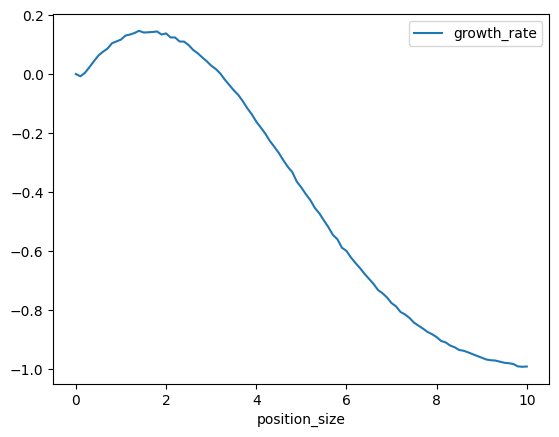

In [ ]:
#simulation 2
def kelly_position_size(p,b,a):
  return (p/a - (1-p)/b)

data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')
share_price = data.iloc[0].Close
b = 12.113929748535156/share_price           # win payout % per share
a = 5.669999694824218/share_price            # loss payout % per share
p = 0.5833333333333334                       # strike rate of the strategy %/100, accuracy

li = []
LEVEL = 10             # 0 - 100 in percentage % Explained in the following discussion

for key, val in dic.items():
  li.append(
      [
          key,
          pd.DataFrame(
              val[1]
              ).sort_values(
                  by = 0,
                  ascending = False
                  ).iloc[
                      -math.ceil(
                          len(
                              pd.DataFrame(val[1])
                              )* (LEVEL/100)
                          )
                      ].values[0]
        ]
    )
print('done')
gr = pd.DataFrame(li, columns =  ['position_size', 'growth_rate'])
print('Optimal point [position_size, and growth median rate] '+str(list(gr[gr.growth_rate == gr.growth_rate.max()].iloc[0])))
gr.plot(x = 'position_size', y = 'growth_rate')

In [ ]:
#simulation 3
from IPython.display import clear_output
import pandas as pd
import yfinance as yf
import math
import numpy as np

lii = []
for i in range(1,100):
  li = []
  for key, val in dic.items():
    li.append(
        [
            key,
            pd.DataFrame(
                val[1]
                ).sort_values(
                    by = 0,
                    ascending = False      # descending order
                    ).iloc[
                        -math.ceil(
                            len(
                                pd.DataFrame(val[1])
                                )* (i/100)             # level iterrator
                            )
                        ].values[0]
          ]
    )
  gr = pd.DataFrame(li, columns =  ['position_size', 'growth_rate'])
  lii.append([i] + list(gr[gr.growth_rate == gr.growth_rate.max()].iloc[0]) )
  print(i)
  clear_output(wait = True)

99


In [ ]:
# simulation 4
GAME = pd.DataFrame(lii, columns = ['Level', 'postion_size','growth_rate'])

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


custom_color_scale = [(0, 'red'), (0.5, 'yellow'), (1, 'blue')]
hover_text = [f'Level: {row["Level"]}, postion_size: {row["postion_size"]}, g: {row["growth_rate"]}'
              for index, row in GAME.iterrows()]
# Create two 3D scatter plots using plotly.graph_objects
trace1 = go.Scatter3d(x=GAME['Level'], y=GAME['postion_size'], z=GAME['growth_rate'], mode='markers',
                      marker=dict(color=GAME['growth_rate'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')

hover_text = [f'Level: {row["Level"]}, postion_size: {row["postion_size"]}, g: {row["growth_rate"]}'
 for index, row in GAME.iterrows()]
GAME = GAME.iloc[0:int((45/100)*len(GAME))]   # first 45 % of the population.
trace2 = go.Scatter3d(x=GAME['Level'], y=GAME['postion_size'], z=GAME['growth_rate'], mode='markers',
                      marker=dict(color=GAME['growth_rate'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
fig = make_subplots(rows=1, cols=2, specs=[
    [{'type': 'scene'},
      {'type': 'scene'},
      ]
  ], subplot_titles=['(Level,postion_size,growth_rate)', '(Level,postion_size,growth_rate)'])
fig.add_trace(trace1, row=1, col=1)
fig.update_scenes(xaxis_title='Level', yaxis_title='postion_size', zaxis_title='growth_rate', row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_scenes(xaxis_title='Level', yaxis_title='postion_size', zaxis_title='growth_rate', row=1, col=2)
fig.update_layout(
    hovermode='x',
    title_text=
    '3D Scatter Plots for Columns (Level, postion_size, growth_rate) with conditions and (Level, postion_size, growth_rate) Without conditions at probability ' + str(p),
)

# Show the interactive subplot
fig.show()

Simulations Descriptions

1.   Gathering data for different position sizes
2.   Getting max growth rate for the investor at the 10th Level for different position sizes.
3.   Repeating the point 2 but for every level
4.   Plotting those gathered data in point 3



Remember the industry stated belief of who should be the investors that should use leverage. The belief says that leverage is not a suitable tool for all investors, especially those with a low-risk tolerance and LIMITED Experience. The belief also states that thorough research and risk management are crucial before using leverage. Those blue dots in the first graph above represent investors who are extremely thorough with their investment and a robust risk management that tries to incorporate as many variables as possible that may affect their journey of investing.

This is the main reason why we focus on the quality of SELF-RELIANCE and SELF-SUFFICIENCY in our clients, users, and investors.

Outsourcing your investment decisions has many pros and cons but two of the main cons are long-term end capital growth rate limitation and you learn absolutely nothing about financial markets and the ecosystem it evolves in.


To summarise the above simulations, we simulated 10,000 investors' journeys randomly giving certain parameters of uncertainty to calculate the growth rate of the end capital following a particular position size of the investment strategy we are discussing at different levels. We are guessing you might be confused by the above statement. Let us simplify.

We are going to use an analogy to explain as simple as possible. Pick any competitive game that has a numerical ranking system for example 0-100 level. 0 denoting beginner and 100 denoting an expert. We took the data generated by 10,000 investors randomly based on the criteria and sorted them in descending order concerning growth rate. Then we extracted the growth rate based on the percentage parameter of how much a certain level of investor was able to achieve. For example, the possible growth rate achieved by the bottom 1st  % of the 10000 investors is denoted by Level 1. Level 2 denotes the respective displayed possible growth rate achieved by the bottom 2nd  % of the 10000 investors. And so on.

You may have noticed this by now, we have created a dummy dataset that gives us an idea of the real-world scenario of how your investment journey can play out depending on your expertise as an investor and how good you are with the strategy that we are trying to build. A dummy game of solo leveling of investors in terms of the growth rate they might end up with at the end of their journey.

You might feel contradictory by seeing those blue dots in the graph and the growth rate and unreal out-of-the-world position size after level 95 and the Kelly Criterion simulations that we did. Remember, the Kelly Criterion was designed to maximize the long-term growth of the capital. But, when we played with the above data, we were able to see that the Kelly criterion coincided with the 50th % of the investor’s end capital growth rate in our case for our invented game. You may believe that the data in blue dots above the level of 95+ are some outlier, unachievable goals and cannot be achieved in the real world. But, if you analyze financial markets, some investors outperform other traders and show results not to that level the game that we played showed us but to some extent approximate those returns in the figurative sense.

Please remember that this discussion is for educational purposes only. So to learn about the outliers that the game we played gave us. Let us assume for a moment that those data points in the blue exist in the real world. One of the burning questions that we have is, how are the investors in blue dots displayed in these graphs able to achieve those goals, results, and that level of 95 + for the very same strategy with the same accuracy and with the same payouts?  Unfortunately, we do not have the answer to this question. The strategy of profitable investors, and hedge funds is not of public information. We are a synthesis research fin-ed-tech firm and only have access to information available in the public domain. We have no privileged information that gives us an edge.  Our firm builds services solely on data analytics on data available in the public domain. But if we try to guess how did they achieve it. We can try. Our attempt to guess the answer to this question is as follows.
We would look at the journey of these investors that the game gave us and look for patterns. Below is the code for analyzing these patterns.

Please, if you do not have a coding background, make sure that you at least read the insights generated from this game/algorithms.


In [ ]:
# Final simulation
from IPython.display import clear_output
import pandas as pd
import yfinance as yf
import math
import numpy as np

def position_size(p,b,a):
  return (p/a - (1-p)/b)

def Investor_journey( share_price, no_shares, p, b, a, num_bets, position_size):
  base_capital = 0
  initial_capital =  share_price * no_shares
  cap_li = []
  bet_sizes = []
  no_sharess = []
  pnl = []
  outcomes = 0                                   # TRACKING ACCURACY for outlier analysis
  base_capital = initial_capital                 # base capital on which leverage is provided.
  # f = position_size(p,b,a)                     # position Sizing function
  f = position_size
  cap_li.append(base_capital)
  pnl.append(0)
  for _ in range(num_bets):                                     # simulating multiple trades in loop
    bet_size = base_capital * f                                 # using leverage and then investing if f > 1
    no_shares = math.floor(bet_size / share_price)              # getting number of share by the amount invested
    outcome = np.random.choice([0, 1], p=[1 - p, p])            # getting random win loss indication based on strike rate
    if outcome == 1:                                            # in case of sucess
      outcomes += 1
      pnl.append(share_price * b * no_shares)                   # profit for this trade
      base_capital = share_price * b * no_shares + base_capital # adding magnified profit to base capital
    else:
      pnl.append(- share_price * a * no_shares)                 # loss for this trade
      base_capital = -share_price * a * no_shares+ base_capital # subtracting magnified loss from the base capital
    if base_capital <= 0 :                                      # breaking in case of bankrupcy
      cap_li.append(0)
      bet_sizes.append(0)
      no_sharess.append(0)
      return base_capital,cap_li, bet_sizes, pnl, no_sharess
    bet_sizes.append(bet_size)
    cap_li.append(base_capital)
    no_sharess.append(no_shares)                                # looping till the loop is over Num_bets
  bet_sizes.append(base_capital* f)
  no_sharess.append(math.floor(base_capital* f / share_price))
  return base_capital, cap_li, bet_sizes, pnl, no_sharess, outcomes    #editted


def Monte_carlo_simulation(position_size):
  monte = 10000
  fin_cap, cap_li_li, bet_sizes_li, pnl_li, no_shares_li, outcomes_li = [], [], [], [], [], []
  gr_rate = []                                                    # storing growth rate

  for i in range(monte):
    final_capital, cap_li, bet_sizes, pnl, no_sharess, outcomes = Investor_journey( share_price, no_shares, p, b, a, num_bets,position_size) #editted
    fin_cap.append(final_capital)
    gr_rate.append((final_capital - initial_capital)/(initial_capital))
    cap_li_li.append(cap_li)
    bet_sizes_li.append(bet_sizes)
    pnl_li.append(pnl)
    no_shares_li.append(no_sharess)
    outcomes_li.append(outcomes)
    if i%(monte/10) == 0:
          print(i)
  return fin_cap, gr_rate, cap_li_li, bet_sizes_li, pnl_li, no_shares_li, outcomes_li



data = yf.download('AAPL', start='2020-01-01', end='2024-01-31')
no_shares = 10
num_bets = 10                               # no of trades
share_price = data.iloc[0].Close
initial_capital =  share_price * no_shares
# setup
b = 12.113929748535156/share_price           # win payout % per share
a = 5.669999694824218/share_price            # loss payout % per share
p = 0.5833333333333334                       # strike rate of the strategy %/100, accuracy

dic = {}
for i in range(101):
  print(i/10)
  dic[i/10] = Monte_carlo_simulation( i / 10 )
  clear_output(wait = True)
print('done')

done


In [ ]:
# You can check the nth investor's journey ranging  1-9999  with specified position size
n = 84     # nth investor in 10000 investors
ind = 4.5  # position size from 0.1-10.0
print("A single investor's journey with the above setting for the discussed strategy with final capital -> ", dic[ind][0][n], " with hit rate out of ", dic[ind][6][n],' out of 10')
pd.DataFrame([
    dic[ind][2][n],
    dic[ind][3][n],
    dic[ind][4][n],
    [0]+[str((x - y)/y*100) +' %' for x, y in zip(dic[ind][2][n][1:], dic[ind][2][n][:-1])],
    dic[ind][5][n]
    ]).T.rename(columns = {0 : 'Base_capital', 1:'Leverage_used', 2:'Profit_or_Loss', 3: '% portfolio gain or loss',4:'No of Shares per trade'})


A single investor's journey with the above setting for the discussed strategy with final capital ->  563.309457397461  with hit rate out of  4  out of 10


,Base_capital,Leverage_used,Profit_or_Loss,% portfolio gain or loss,No of Shares per trade
0,750.875015,3378.937569,0.0,0.0,45.0
1,495.725029,2230.76263,-255.149986,-33.980353731593055 %,29
2,847.028992,3811.630463,351.303963,70.86669870635119 %,50
3,563.529007,2535.880531,-283.499985,-33.46992694694944 %,33
4,376.419017,1693.885577,-187.10999,-33.20325797233398 %,22
5,251.679024,1132.555607,-124.739993,-33.1386002414926 %,15
6,433.38797,1950.245865,181.708946,72.19868526421658 %,25
7,291.637978,1312.370899,-141.749992,-32.707412801556934 %,17
8,497.574783,2239.086525,205.936806,70.61385057589588 %,29
9,333.144792,1499.151565,-164.429991,-33.046287042733304 %,19


In [ ]:
# final simulation
from IPython.display import clear_output
import pandas as pd
import yfinance as yf
import math
import numpy as np

lii = []
for i in range(1,100):
  li = []
  for key, val in dic.items():
    li.append(
          [key]+
          list(
              pd.DataFrame(
                  {
                      0:val[1],
                      1:val[6]
                  }
              ).sort_values(
                by = 0,
                ascending = False
              ).iloc[
                -math.ceil(
                    len(
                        pd.DataFrame(val[1])
                        )* (i/100)
                    )
              ].values
          )
        )
  gr = pd.DataFrame(li, columns =  ['position_size', 'growth_rate','outcome'])
  lii.append([i] + list(gr[gr.growth_rate == gr.growth_rate.max()].iloc[0]) )
  print(i)
  clear_output(wait = True)

99


In [ ]:
GAME = pd.DataFrame(lii, columns = ['Level', 'position_size', 'growth_rate','outcome']).rename(columns = {'outcome':'correct_trades'})

# simulation Final

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


custom_color_scale = [(0, 'red'), (0.5, 'yellow'), (1, 'blue')]
hover_text = [f'Level: {row["Level"]}, correct_trades: {row["correct_trades"]}, g: {row["growth_rate"]}'
              for index, row in GAME.iterrows()]
# Create two 3D scatter plots using plotly.graph_objects
trace1 = go.Scatter3d(x=GAME['Level'], y=GAME['correct_trades'], z=GAME['growth_rate'], mode='markers',
                      marker=dict(color=GAME['growth_rate'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')

hover_text = [f'Level: {row["Level"]}, correct_trades: {row["correct_trades"]}, g: {row["growth_rate"]}'
 for index, row in GAME.iterrows()]
GAME = GAME.iloc[0:int((45/100)*len(GAME))]   # first 45 % of the population.
trace2 = go.Scatter3d(x=GAME['Level'], y=GAME['correct_trades'], z=GAME['growth_rate'], mode='markers',
                      marker=dict(color=GAME['growth_rate'], size=6, colorscale=custom_color_scale),
                      hovertext=hover_text,hoverinfo='text')
fig = make_subplots(rows=1, cols=2, specs=[
    [{'type': 'scene'},
      {'type': 'scene'},
      ]
  ], subplot_titles=['(Level,correct_trades,growth_rate)', '(Level,correct_trades,growth_rate)'])
fig.add_trace(trace1, row=1, col=1)
fig.update_scenes(xaxis_title='Level', yaxis_title='correct_trades', zaxis_title='growth_rate', row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.update_scenes(xaxis_title='Level', yaxis_title='correct_trades', zaxis_title='growth_rate', row=1, col=2)
fig.update_layout(
    hovermode='x',
    title_text=
    '3D Scatter Plots for Columns (Level, correct_trades, growth_rate) with conditions and (Level, correct_trades, growth_rate) Without conditions at probability ' + str(p),
)

# Show the interactive subplot
fig.show()

<Axes: xlabel='Level'>

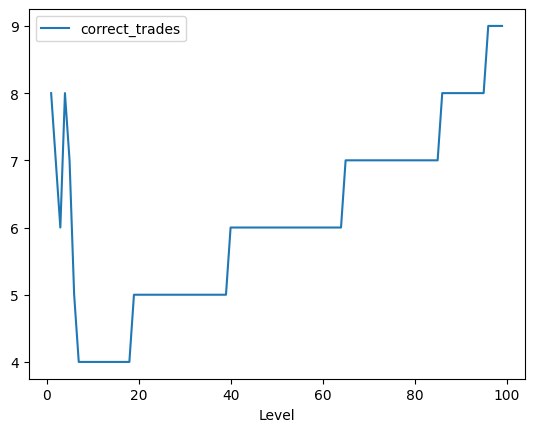

In [ ]:
GAME = pd.DataFrame(lii, columns = ['Level', 'position_size', 'growth_rate','outcome']).rename(columns = {'outcome':'correct_trades'})
GAME.plot(x='Level',y = 'correct_trades')

Now we are extremely curious about what happened in the extreme levels of this game. Because if we consider the SEBI reports about profitable investors for F&O markets with this simulated game. If we take a subset of that market that follows the strategy with the given accuracy and risk-reward ratio that we are doing the simulations on. 90 % of the investors fall under the 1-6 % of this level. The rest of the 10 % approximately falls under the levels of 7%-99% of levels of our game. That's unfortunate. Let us find out the journey in the game at these extreme levels we just generated.



In [ ]:
i = 4
li = []
for key, val in dic.items():
  li.append(
        [key]+
        list(
            pd.DataFrame(
                {
                    0:val[1],
                    1:val[6],
                    2:val[2],
                    3:val[4]
                }
            ).sort_values(
              by = 0,
              ascending = False
            ).iloc[
              -math.ceil(
                  len(
                      pd.DataFrame(val[1])
                      )* (i/100)
                  )
            ].values
        )
      )
gr = pd.DataFrame(li, columns =  ['position_size', 'growth_rate','outcome','Journeys','pnl_li'])

In [ ]:
gr[gr.outcome == 8] # in the above graph, level 6 is 5 trades correct

,position_size,growth_rate,outcome,Journeys,pnl_li
0,0.0,0.0,8,"[750.8750152587891, 750.8750152587891, 750.875...","[0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, ..."


So the spikes in the initial classes are due to the position size that we took which is Zero. Even if we took correct trades there was no activity as the game is designed to simulate leverage in which case position zero is multiplied every time profit and loss are calculated. The reason why it showed up in the graph is because we considered as maximum growth rate which ends up as zero as you can see in the above cell. Bummer. But what does a journey look like for 1-6% of the class in the game? We will draw a graph of correct_trades concerning different levels by the median. we kept extra variables for your reference.

To be precise, we divided the simulations into different levels at different position sizes and took the median at these two levels to get as approximate data as possible.



In [ ]:
level_correct_trade = []
for i in range(2,101):
  li = []
  dict_li = {}
  for key, val in dic.items():
    if i != 1 :
     dict_li[key] = (
                pd.DataFrame(
                    {
                        0:val[1],
                        1:val[6],
                        2:val[2],
                        3:val[4]
                    }
                ).sort_values(
                  by = 0,
                  ascending = False
                ).iloc[
                  -math.ceil(
                      len(
                          pd.DataFrame(
                            {
                                0:val[1],
                                1:val[6],
                                2:val[2],
                                3:val[4]
                            }
                        )
                          )* (i/100)
                      ):-math.ceil(
                      len(
                        pd.DataFrame(
                          {
                              0:val[1],
                              1:val[6],
                              2:val[2],
                              3:val[4]
                          }
                      )
                          )* ((i-1)/100)
                      )
                ].rename(columns = {
                    0:'position_size',
                    1:'outcomes',
                    2:'journeys',
                    3:'pnls'
                })
            )
    else:
      dict_li[key] =           (
              pd.DataFrame(
                  {
                      0:val[1],
                      1:val[6],
                      2:val[2],
                      3:val[4]
                  }
              ).sort_values(
                by = 0,
                ascending = False
              ).iloc[
                -math.ceil(
                    len(
                        pd.DataFrame(
                          {
                              0:val[1],
                              1:val[6],
                              2:val[2],
                              3:val[4]
                          }
                      )
                        )* (i/100)
                    ):
              ].rename(columns = {
                    0:'position_size',
                    1:'outcomes',
                    2:'journeys',
                    3:'pnls'
                })
          )
    li.append(dict_li[key].outcomes.median())
  level_correct_trade.append([i, pd.DataFrame(li).median().values[0]])
  print(i)
  clear_output(wait = True)
print('done')

done


<Axes: xlabel='Level'>

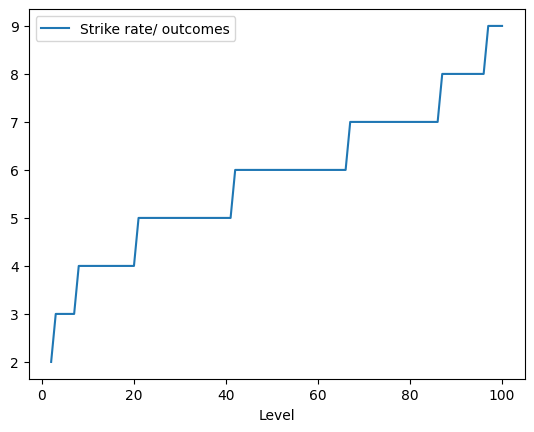

In [ ]:
pd.DataFrame(level_correct_trade, columns  = ['Level', 'Strike rate/ outcomes']).plot(x = 'Level', y = 'Strike rate/ outcomes')

It’s evident from the above graph that as the level of the investors increases, the strike rate increases.

**This is one of the most important stories told from the above graph**

As we discussed in one of the above sections about the distribution of profitable investors to non-profitable traders. It came out to be approximately 90:10 in a certain financial market section where the ratio is Investor in loss: to investors in profitable zone overall. It stated that 90 % of the investors lost all of their capital at the end of their investors journey.
If we compared the real-world data to our game when it comes to long-term end capital and its growth rate is Zero and in the case of brokers who do not limit the investors' loss to their wallet, the loss may be negative. It just doesn’t make sense. Nothing adds up. In this case, one and one no longer make two. Please hear us out.

If we compare the real-world data with the above graph. If we pick a sub-set randomly from the sector where the investor's loss-win ratio is 90:10 that follows a strategy with an accuracy that we discussed in the above simulations where we did not make up the numbers but rather calculated on real market data. 90 % of the investors in this subset suffer losses in the bracket of 1%-6% of the levels in the graph displayed above. But here is the argument, the y-axis of the graph is the number of successful trades. This bracket experiences the hit rate of 2 trades. This bracket of (1-6)% consists of investors who got only 2-3 successful trades out of 10 trades or their end capital ended up zero even before they were able to reach 10 trades. That is what we want to emphasize.  The strike rate!

Even if we toss an unbiased coin, you would end up with a normal distribution of a mean of 50 % strike rate as a mean and median if we considered heads as success and tails as a failure. 90 % of the investors ending up with a strike of 20% - 30 % is highly unlikely if we compare it to the game we designed. We believe and this is our opinion that this is not the case. Investors will have an expected strike rate of around 50 % if we can pick a subset from a larger subset randomly. So the majority of the investors should be around the level of 19-39 levels which unfortunately is not the case in the real world scenario.

So the real question to be asked is what is the difference between the output of the game played above and the real-world scenario? Which variable/concept causes this abnormality in the real-world scenario?
According to our beliefs and opinions, that one variable is the investor itself. There is one significant difference between the investors in the above game and the investors present in the real-world scenario is – the way one structures their investment journey. In simple words, Discipline. The investor in the above game followed a risk-reward-based strategy with a small edge in the market of a 55%-60% strike rate.  No matter how good the trade might looked. The investors in the above game were completely devoid of emotions and exited when the target was achieved or when the stop loss was triggered regardless just like robots. The investors in the above game were decisive. They accepted their decision about being right about the trade or wrong about the trade when target or stop loss were triggered respectively, they exited the positions according to the strategy they designed. The investors In the above game kept their leverage fixed every single time the trade was placed. The investors in the above game never chased losses. In short, Trading / Investing Discipline. If some of the above disciplines were followed, the game SUGGEST that you may increase the chances / Probability of landing the investors in the bracket of 19-39 % level of the game which has a positive long-term end capital growth rate.

If we are to guess the behavior of the majority of the real-life investors who end up losing their capital.Behaviors would include - Placing trades without any strategy, anywhere they feel based on pure guess. Using random variable leverage with each trade. No backtesting. No foward testing. Listening to others without even understanding the underlying assumption of that instrument or the tip that was designed for. Not harboring the ability to continuously learn. No risk management especially in extreme market volatility and uncertainty. Laziness for research. Fear, Fear of missing out, herd mentality, and emotionally driven decisions. Extremely lack of patience with a long-term perspective. Fear of making mistakes and disability of limiting the losses when one is made. Refusing logical reasons to adapt to the market conditions. Chasing losses. Getting into risky assets to make quick abnormal returns disregarding the possibility of market manipulation and fraud. Ignoring regulatory updates and legal risk. Ignoring external factors like inflation, currency, and geopolitical events, giving control of your capital to unverified individuals, copying others without understanding the underlying assumption, depending on others' direction to make any investment decisions. Getting into investing under the impression of get rich quick schemes. Becoming a victim to controversial marketing strategies used to attract non-investors into the world of investing that are based on a glorified lifestyle, using Fear, Greenwashing which shifts your anchoring bias concerning your financial health/situation with someone having a better financial health/situation and the list goes on.

One may argue that the data about the 90-10 loss-win ratio is dedicated to the F&O segment. F&O is much more complicated than ordinary stock markets. These complications may arise because of additional variables like strike price, time to Expiration, Volatility, Risk-free rate, dividend, implied volatility, Greeks, liquidity, and much more. But if one is asked to incorporate, build a strategy that considers extra variables for this segment. In simple words, even if we consider the basics of this segment, the complexity is increased many folds. Yet, The expected strike rate of that strategy possibly lies between 40-60 % with 50 as the mean and median which is a reasonable expectation provided it’s well designed and effectively executed strategy.

This was the main intention of the Generic strategy-building document. This document was intended to find answers to this question what is the value a trading/investing discipline offers? Our rigorous research led to the curiosity of finding answers to questions that cater to the optimization of an investor’s journey and coming up with some structured way of investing. We admit it’s not perfect. It’s generic, it’s basic, it has flaws. We do admit that we are not perfect. But at least, it’s a start. And as time goes on, we intend to refine it. We humbly request you to please share our platform infiflux.com

When we displayed our Vision of our firm “Make Everyone interested in Financial markets”. We as a Firm including our premium products and Central finance information index meant to transfer this knowledge, and information, process this information, and analyze and verify this information present in the public domain which intends to reduce losses and optimize Every investor’s investing journey across the board to the best of our abilities.





Now, let's bring back the burning questions we had. which was, how are the investors in blue dots displayed in these graphs able to achieve those goals, results, and that level of 95 + for the very same strategy with the same accuracy and with the same payouts? We still do not have the exact answer and we can only guess.

One case is the strike rate, the number of trades that these investors got right. It's around 90 %. You may say it’s impossible to achieve 90 % accuracy for a strategy that tested out with an accuracy of around 58 %. However, that is not the case for profitable investors despite using the same strategy. Remember, every investor is using the same strategy with the same parameters. They are including some extra variables in their strategy. Again we do not know what variables but we can only guess.

To achieve high accuracy with the same strategy, one thing is certain they do not enter every single time when the conditions of these strategies are met. For example, if your strategy suggests taking a long position when every condition is met for a particular instrument in an extremely bearish market does not make much sense. This is studying the strategy’s environment like the state or the conditions of the markets. In industry, this is considered to be one of the basic techniques to increase the accuracy of the present strategy. One way to achieve this is to have a second separate system outside the G-BIArchitecture. This second system has one and only one intention of gathering variables like market information and thorough research to maximize the probability of detecting false signals and avoiding them. In other words, trying not just to find when the base strategy conditions are met but also to analyze the entire ecosystem that correlates to that instrument by arriving at the metric of highest success rate or highest failure rate gives these investors an additional confirmation whether to invest or not.  A simple example could be, the long signal generated by your strategy in bearish markets. These are just some basic ideas we are throwing at you for how one can increase the accuracy.  Unfortunately, these kinds of systems cannot be backtested as the state of the markets can only be analyzed, and researched in real-time. This is why it is very difficult to come up with a system that can give reassurance to your base investment strategy. This is also one of the reasons why experience matters the most when it comes to financial markets. Which we are just starting to accumulate. We have some curious ideas on how to build these secondary systems that can help you give some kind of probabilistic metric that your strategy may succeed or fail. This Secondary system needs more of our time, research, and effort. This secondary system will not be discussed here as this document has stretched enough and it will make things even more complicated. We do intend to release more documents that will contain alike concepts that we discussed under the guide section and will be more refined with the feedback that we will receive from different investors across the ecosystem.

So we please Humbly request you to please subscribe to our newsletter for the latest updates related to innovative products, uniquely designed documents formatted in the form of simple questions and answers trying to explain some tough concepts as simply as possible, algorithms, games, and much more.



In [ ]:
#RECAP BELOW

We tried our best to find any mistake that existed in the above simulations but were not able to. But if you were able to find some mistakes or if you believe that we missed a major concept that could change the result, please fill out the feedback form under our Guide section.





In phase 4: all you need to do is recheck every variable that we discovered from phases 1 to 3 before entering into any investment. This may help you gauge the delta / by how much the sentiment of the market has shifted. Any variable has changed or not. If yes, make changes accordingly to your trading strategy in real-time, to reduce losses to the minimum. This Phase is called Monitoring and investing.


Few notes.

We chose Python for simple reasons, it was easy, and the availability of the colab ecosystem for demonstration purposes. You can use any other language that you may be comfortable with. The way we design this document in the most generic way possible which does not require high prequsit. You can switch computer language according to your liking. We would suggest pine scripting used in the trading view. It has an inbuilt strategy tester, paper trading, and much more in the free version. You can find the details in the practical implementation document under the Guide section of our platform.

Please take this notebook as an Opinion. This notebook is provided for information and education purposes ONLY. Please note, the Kelly criterion is one way of handling risk management concerning portfolio management and position sizing. There are many other ways. But let us discuss those, at some other time in detail. some of them are mentioned below

*   Fixed Profit Target Betting
*   Kelly Criterion with Kelly - Optimal Portfolio
*   Fractional Kelly Criterion with confidence Factor
*   Fractional Kelly
*   Fixed Proportional Betting
*   Portfolio Optimization model
*   Half Kelly
*   Constant Proportion Portfolio Insurance (CPPI)
*   Volatility Targeting
*   Conditional Value at Risk (CVaR)
*   Proportional Betting
*   Variable Bet size
*   Dynamic Position Sizing
*   Expected Utility Theory
*   Bayesian Decision Theory
*   Maximum Drawdown Management
*   Constant Leverage Ratio
*   Monte Carlo Simulation for Risk assessment
*   Ralph Vince's Optimal f
*   Fixed Ratio Money Management
*   Constant Proportion Portfolio Management (CPPM)
*   Geometric mean Maximization
*   Universal Portfolio Theory (UPT)
*   Risk Parity
*   Stochastic Theory
*   Antifragile Position Sizing
*   Behavioral Finance-based Position Sizing
*   Adaptive Position Sizing
*   Risk Budgeting
*   Tail Risk Hedging
*   Regime-based Position Sizing
*   Scenario Analysis
*   Dynamic Bet sizing with Bayesian Updating
*   Convex Optimization for Portfolio Construction
*   Multi-Factor Risk Parity
*   Machine Learning-driven Position Sizing
*   Portfolio Margining and Cross Asset Hedging
*   Robust Optimization under uncertainty
*   Dynamic Conditional Correlation Models
*   Hierarchical Risk Parity
*   Factor-Based Position Sizing
*   Drawdown Control Strategies
*   Equal Weighting
*   Inverse Volatility Weighting
*   Risk Parity with Target Leverage
*   Max Diversification Strategy
*   Kelly Criterion with constraint Optimization
*   Factor rotation Strateies
*   Multi-Objective Optimization
*   Deep Learning for Portfolio Optimization
*   Reinforcement learning
*   Genetic Algorithms for Position Sizing
*   Ensemble Learning for Risk Management
*   and the list goes on and on and on .....
*   You can come up with one of your own that caters to your risk faced in financial markets




Before we end this document, we would like to discuss some important concepts when it comes to investing for multiple investments. To not make this document boring, we will focus on the major parts of each phase.

When it comes to investing in multiple instruments of financial markets, the following are some points we would like to mention from each phase of the G-BIA

*   Phase 1: Portfolio management. In our opinion. You need to perform at least basic risk management like diversification etc, as mentioned in the risk management document under the preliminary market analysis segment of the guide section of Infiflux.com. Build your portfolio and allocate different sizes or fractions of your entire capital to individual investments based on the methods to decide the internal composition of your portfolio.
*   Phase 2: Refine your different strategies to different instruments and increase your understanding of the price moment that occurs in each instrument of the respected Financial markets. Polish each strategy that is used to analyze and predict the price moments in each instrument that lies in different Financial markets. Calculate the Accuracy, hit rate, and win-loss probability of each different strategy by backtesting for the respective instrument.
* Phase 3: Calculate the average Reward (gain from point of trade entry) and Average Risk(loss from point of trade entry) for each Instrument when backtested from the accuracy calculation in phase 2. This will give you an estimate of the risk-to-reward ratio that will help you to build confidence interval to your liking of handling risk. Now choose your position sizing strategy for each instrument that caters to your style of investing. Some of the position sizing strategies are mentioned above for reference purposes. If you chose the Kelly criterion approach. With accuracy – win-loss and risk-to-reward ratio, a person can calculate the appropriate position sizing for each instrument that lies in respective Financial Markets. For example, if your portfolio composition is 5 instruments say x1, x2, x3, x4, and x5 where the Kelly fraction for each one comes out to be less than one say f1, f2, f3, f4, and f5. This means the budget allocated to each instrument say b1, b2, b3, b4, and b5 where b1 + b2+ b3+ b4 + b5 = B where B is the total budget. The position size of each instrument is the portion or fraction of the budget allocated to the instrument that will be used on each trade. That is f1*b1, f2*b2, f3*b3, f4*b4, and f5*b5 for x1, x2, x3, x4, and x5 instruments respectively. But when f > 1, one is tempted to use leverage for different instruments which makes things more complicated and harder to manage risk while simultaneously updating the strategy required to stay on the right side of the market. In our opinion, one can use a small mental trick to make things more simple when one is just starting to invest. One can modify the simple Kelly strategy which is similar to the half Kelly strategy. In our opinion, you can divide the subject budget with the Kelly fraction which is greater than 1, and consider the resulting calculated amount as initial capital.  So let us take the above example and assume every fraction is greater than 1 and suggest to use of leverage. So what we suggest is to consider initial capital for each instrument as b1/f1, b2/f2, b3/f3, b4/f4, and b5/f5 and use the entire sub-capital as position size for the respective instruments. To make it simpler, if you are new to investing and get emotionally disturbed by unprecedented losses. We are suggesting that if your sub budget is  100 dollars out of the 1000 dollars entire budget and the fraction comes out say 3.14. In our opinion, divide the 100/3.14 which is 31.84713375. use this amount as initial capital. This will allow you an reset your bias of the need to use leverage without using leverage because you owe the 100 dollars and trick your mind into not using leverage. Considering 100 dollars as initial capital will tempt you to use leverage to maximize the growth rate of the sub-budget allocated to that particular instrument which is the total amount would be 314 dollars where 214 dollars would be your leverage. Shifting your reference point of initial capital to the Budget/fraction amount and lowering the initial capital will help you increase focus on market analysis and strategy polishing instead of worrying about your capital getting wiped out because of one too-risky instrument in your portfolio. It’s just a mental trick presented as Opinion for beginners.





# Handling Dynamic Market changes Affecting Risk Management

To summarise the Kelly's criterion. F is called the fraction of the current bankroll to wager. If you are at budget B allocated to a certain instrument, it says to wager F * B to get the maximum growth rate if the investment follows the rules of function = (1 + f*b)**p * (1 - f*a)**(1-p) which means geometric. In simple words, when you begin an investment strategy, say by wagering f*B, whatever amount you end up with regardless of success or failure, win or loss. You reinvest everything that was the outcome of the previous bet. In case when f > 1. It says that you need to wager f*B on the initial capital only to maximize the growth rate of the end capital after n trades, and trials. The entire structure of placing a wager remains the same, after the wager where the initial bet is placed. If you follow the simple Kelly Criterion approach, you are asked to wager everything which was the outcome of the previous wager, in the case of 2nd trade, by Kelly criterion condition to be useful, you are expected to wager the amount of the previous wager, trade regardless of profit or loss. Repeat this process until the number of trades you aim to complete. But in real-world scenarios. The variables concerning the Kelly criterion change in real time. One needs to be mindful of the concepts of Variance, confidence interval, and sensitivity analysis. These concepts will give you an idea of how the changes occur in the end capital when changes are occurring in variables due to dynamic market changes. To address this issue, there are generic solutions which are to adjust bet size, wager, and trade dynamically by updating probabilities and win-loss payouts.

Dynamic Market changes also affect the basic Risk management analysis from phase 1 of G-BIA which includes diversification, capital allocation, and much more. Due to dynamic market changes, there is a huge need for monitoring and making necessary changes in all phases of G-BIA which includes rebalancing the portfolio and variables used for the position sizing strategies that you have implemented like the Kelly criterion. In extreme cases, the entire strategy from phase 2 of core market analysis where the strategy may not make any sense because of drastic dynamic market changes that are denoted by the metric called accuracy which falls under 0.5 or 50%. For some this metric is even higher than 50 % and has the condition that a particular strategy will only be implemented when it's greater than that benchmark.

Accuracy of a strategy falling under certain benchmarks is an indirect way of the market telling you that your assumption no longer holds, the entry-exit strategy became outdated and you are wrong in terms of predicting the changes in price moment in that instrument the strategy is dedicated to caused by a factor that your strategy failed to incorporate the variable causing it, and you need to make necessary changes to your investment strategy ASAP.

There are many other complicated risk management position-sizing strategies. Please choose whichever you feel helps you the most that cater to your style of investing.  The above examples are just for informational and educational purposes Only.





# Order types related to Risk-reward Strategy

The order types that support the risk-reward strategy are as follows

OCO (One Cancels Other): OCO allows you to place two orders simultaneously, and if one of the orders is executed, the other order is automatically canceled. This allows traders to set up both a target price and a stop loss price for the same position.

* A: Target price order: One part of the OCO order is a limit order set at your target price. When the market reaches this price, the limit order is triggered, and your position is exited at the target price to lock in profits.
* B: Stop-Loss Price Order: The other part of the OCO order is a stop-loss order set at your predetermined stop-loss price. If the market moves against your position and reaches the stop-loss price, the stop-loss order is triggered, and your position is exited to limit potential losses.

If your broker does not provide an OCO order, investors who usually use strategies that are based on risk-reward structure follow the basic protocol of placing their trades.
* Placing a Buy order for entering at a desired price. Then place a stop loss order at the desired level limiting your losses permitted by the strategy that uses a specified Risk-reward ratio, followed by a take-in profit order as limit or market order where you exit the position locking in the profits you gain when the desired level is reached. This will be the basic approach to implementing the Risk-reward ratio-based strategy. There are more efficient ways to imitate this similar behavior in financial markets. With a basic trading setup, one may need to place three orders to imitate risk-reward strategies. Most brokers may not provide these three features in one single order type for INTRADAY traders like the one mentioned in the following point.
* One of those optimized order types is GTT Good til trigger. Which allows users to specify conditions for placing a buy or sell order on a financial instrument. It is active for a specific period until one of those conditions is met. GTT can be used to set both target and stop-loss depending on the platform and specific order type. GTT orders are not typically used for intraday trading. Please beware of the validity of GTT which is 1 year in most cases as it may differ from broker to broker.
* Intraday traders may have to use multiple order types to implement their risk-reward-based strategies. Please take the help of generative AI models to get the explanation and examples of each order type to better understand the features and limitations associated with them as the order types are considered products by brokers and may differ from broker to broker in terms of feature offering.  







We humbly request you to build at least one of your investment strategies relying on yourself completely. You can start by referencing other folks' work. But in our opinion, everyone should have at least one unique investment strategy of their own. An individual's investment strategy is an individual's outlook on the Financial markets that he is invested in. The advantage of doing so will give you the ability to re-polish your understanding, and skills required to predict the financial markets and beliefs enabling you to develop a continuous learning approach towards investing.

Please be mindful, that this document was not planned. We were in the same boat as you. This document followed a waterfall model. Hence, we apologize for this document being long, non-professional, and extremely unstructured. Necessary changes and corrections will be in due time based on your feedback. Nothing in this document was predefined. We just took a reference and went with the flow. Answering the questions that arise each insight opens a new dimension of research in financial markets. We searched the internet and everyone suggested having a curious mind when it comes to investing in generating questions about our investments and then finding the answers and being thorough with the reasoning behind these answers.

Please subscribe to our newsletter options under our guide section. To stay updated with the document, algorithms, sophisticated products, and much more based on the feedback provided by you. Please we encourage you to develop your strategy as you may see fit. We hope this document provided some insight for developing a basic investing strategy systematically.

Hope this helps

Careful Investing

Thank you

Be Careful

By Infi-flux


